In [318]:
import pandas as pd

Load LEGO sets data

In [319]:
LEGO_sets_df = pd.read_csv('sets.csv')

### Original data set description

#### Context

LEGO is the largest toy manufacturer on the planet, and there is a growing market for LEGO set investments. Some studies have even shown that you can beat the S&P 500. For example, a single Boba Fett minifigure is now valued at over $3,000. With the goal of looking at this trend, this data has the most up to date list of sets and features along with list and resale prices.

#### Content

This dataset uses a combination of data from two API's from Brickset.com and Bricklink.com. The features include name, year, theme, theme group, subtheme, category, packaging type, number of instructions, retail availability, number of pieces, number of minifigures, user reviews (out of 5 stars), list price in USD, and latest resale price in USD.

List prices and features - Brickset API as of 05/10/2023

Resale Price - Bricklink API as of 05/10/2023

# Data overview

In [320]:
LEGO_sets_df.head()

,Set_ID,Name,Year,Theme,Theme_Group,Subtheme,Category,Packaging,Num_Instructions,Availability,Pieces,Minifigures,Owned,Rating,USD_MSRP,Total_Quantity,Current_Price
0,75-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},16.0,NaN,10.0,0.0,NaN,NaN,NaN
1,77-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},20.0,NaN,11.0,0.0,NaN,NaN,NaN
2,077-1,Pre-School Set,1975,Duplo,Pre-school,NaN,Normal,{Not specified},0,{Not specified},21.0,NaN,10.0,0.0,NaN,0.0,NaN
3,78-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},32.0,NaN,8.0,0.0,NaN,NaN,NaN
4,78-3,Basic Set,1975,Samsonite,Vintage,Basic set,Normal,Box,0,{Not specified},330.0,NaN,10.0,0.0,NaN,0.0,NaN


In [321]:
LEGO_sets_df['Theme_Group'].value_counts()

Miscellaneous       3407
Modern day          2228
Licensed            2068
Pre-school          1547
Action/Adventure    1177
Basic                827
Model making         725
Technical            594
Constraction         491
Historical           468
Educational          435
Racing               270
Girls                240
Junior               228
Vintage              114
Art and crafts        96
Name: Theme_Group, dtype: int64

In [322]:
LEGO_sets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14936 entries, 0 to 14935
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Set_ID            14936 non-null  object 
 1   Name              14936 non-null  object 
 2   Year              14936 non-null  int64  
 3   Theme             14936 non-null  object 
 4   Theme_Group       14915 non-null  object 
 5   Subtheme          11495 non-null  object 
 6   Category          14936 non-null  object 
 7   Packaging         14936 non-null  object 
 8   Num_Instructions  14936 non-null  int64  
 9   Availability      14936 non-null  object 
 10  Pieces            13133 non-null  float64
 11  Minifigures       7686 non-null   float64
 12  Owned             14771 non-null  float64
 13  Rating            14936 non-null  float64
 14  USD_MSRP          5837 non-null   float64
 15  Total_Quantity    12276 non-null  float64
 16  Current_Price     5442 non-null   float6

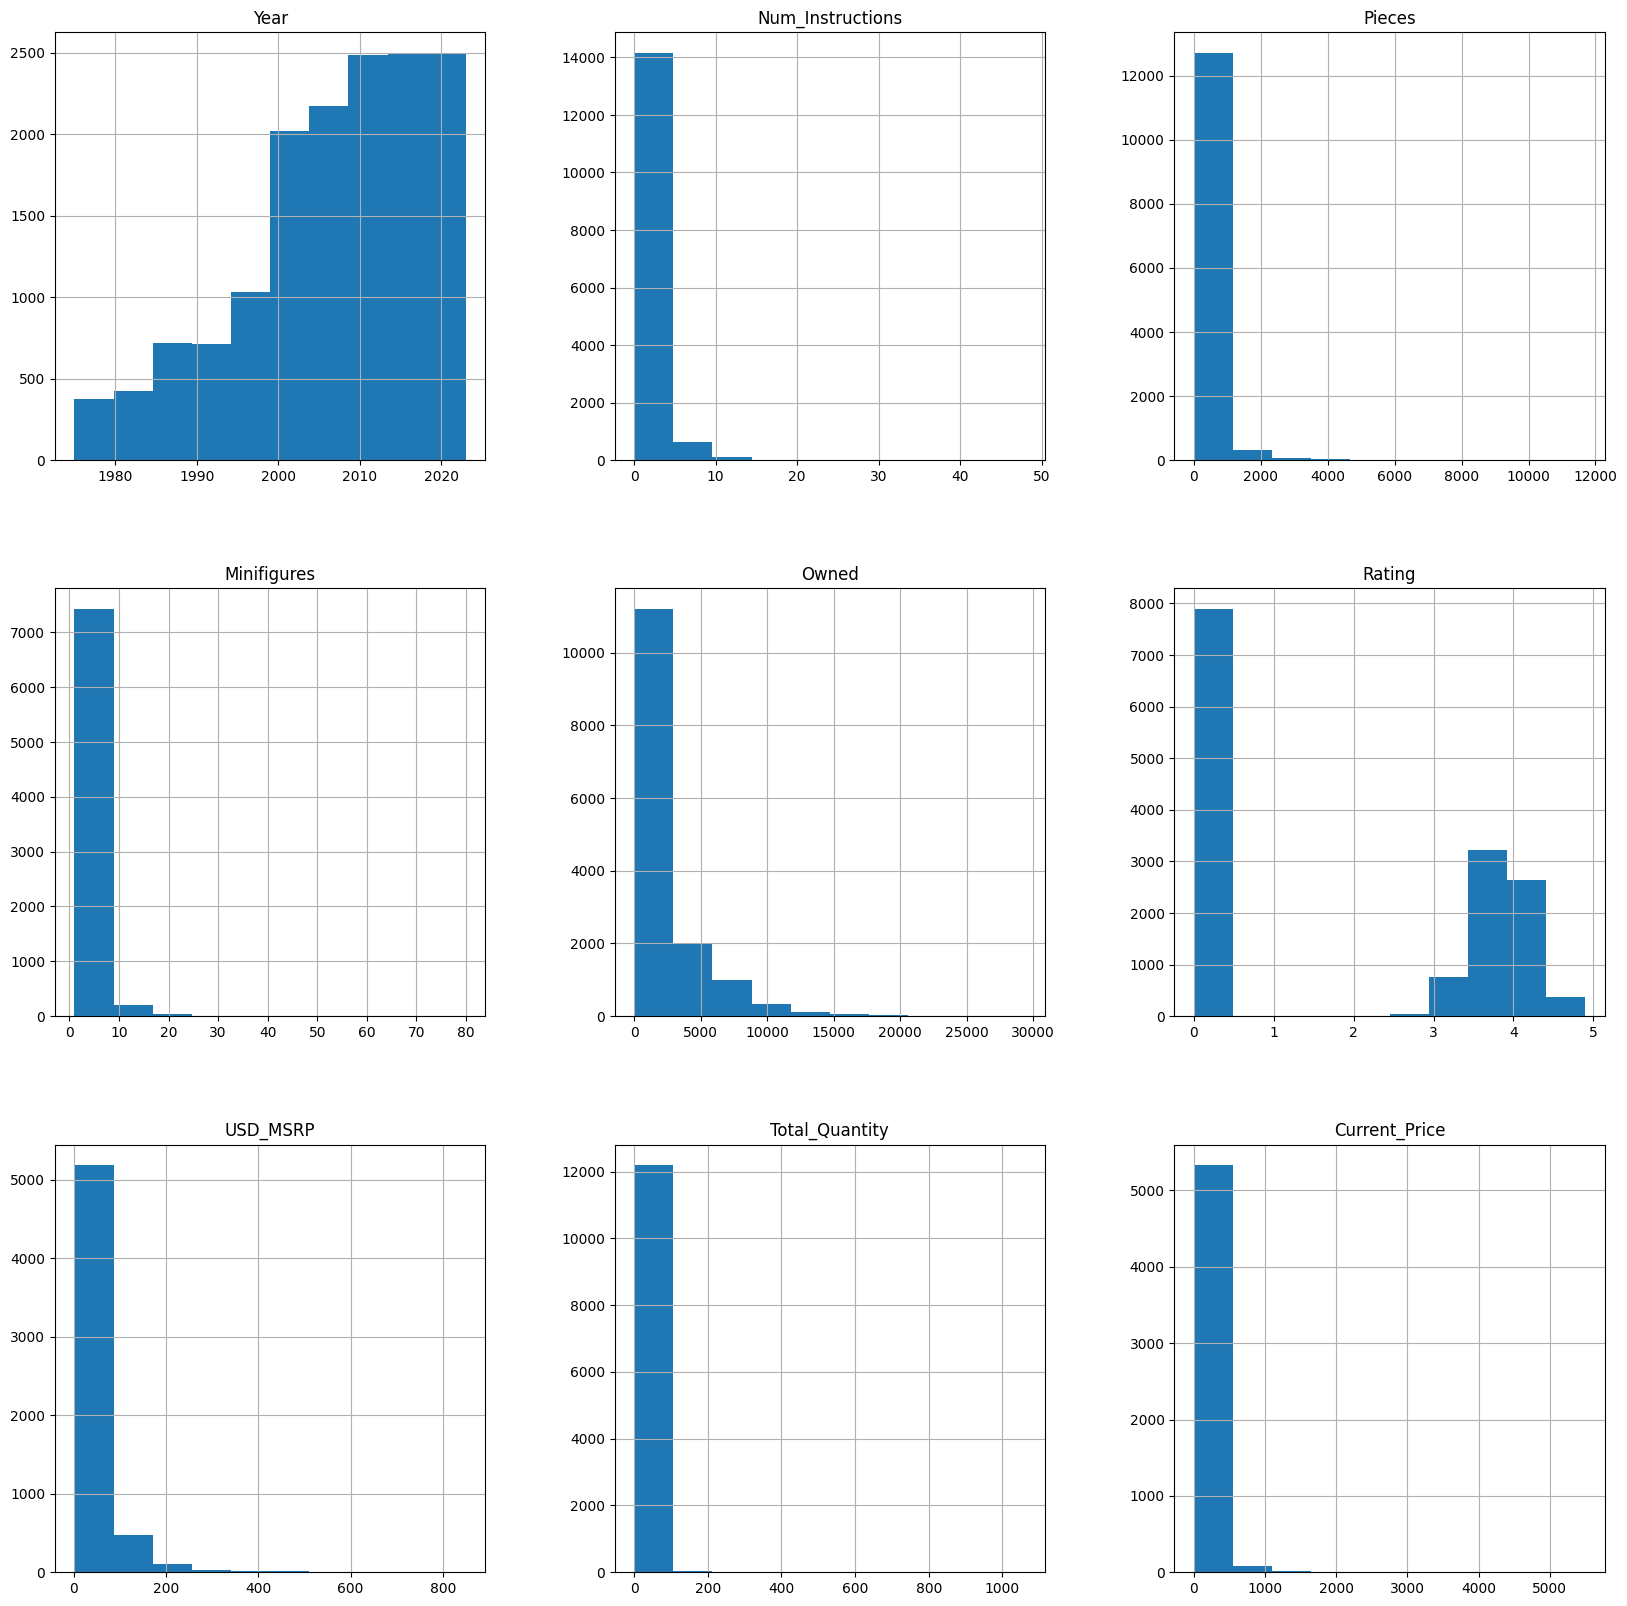

In [323]:
# make histogram of numeric columns only

import matplotlib.pyplot as plt
LEGO_sets_df.hist(figsize=(20,20))
plt.show()

# Price of sets

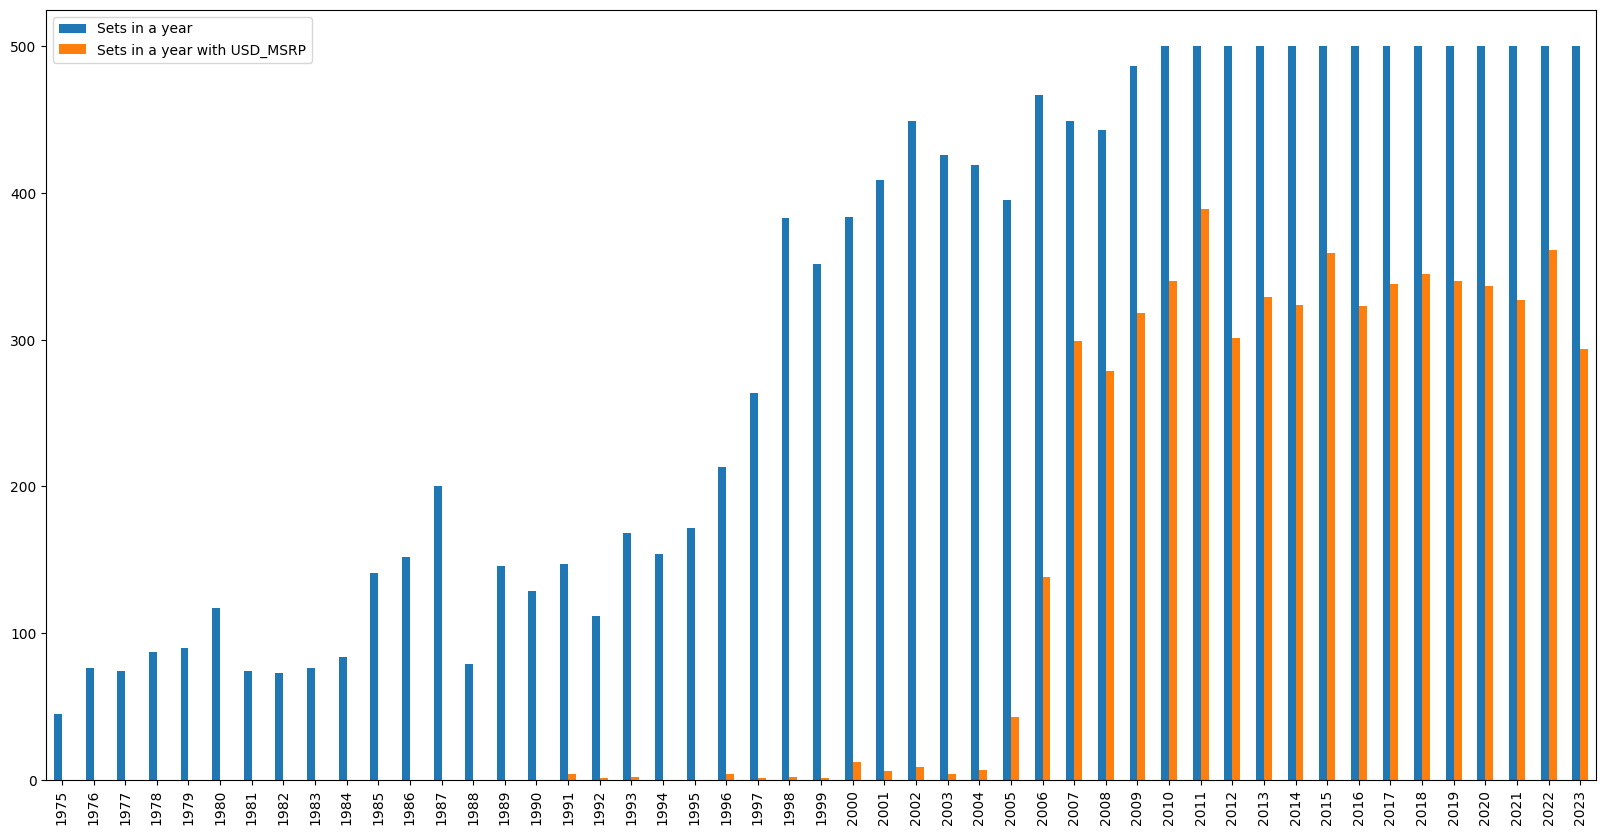

In [324]:
import matplotlib.pyplot as plt

# Calculate value counts
all_years = LEGO_sets_df['Year'].value_counts().sort_index()
non_null_years = LEGO_sets_df[LEGO_sets_df['USD_MSRP'].notnull()]['Year'].value_counts().sort_index()

# Create a DataFrame from the value counts
df = pd.DataFrame({'Sets in a year': all_years, 'Sets in a year with USD_MSRP': non_null_years})

# Create the bar plot
df.plot(kind='bar', figsize=(20,10))

plt.show()

look at price box plot grouped by year after the year 2005

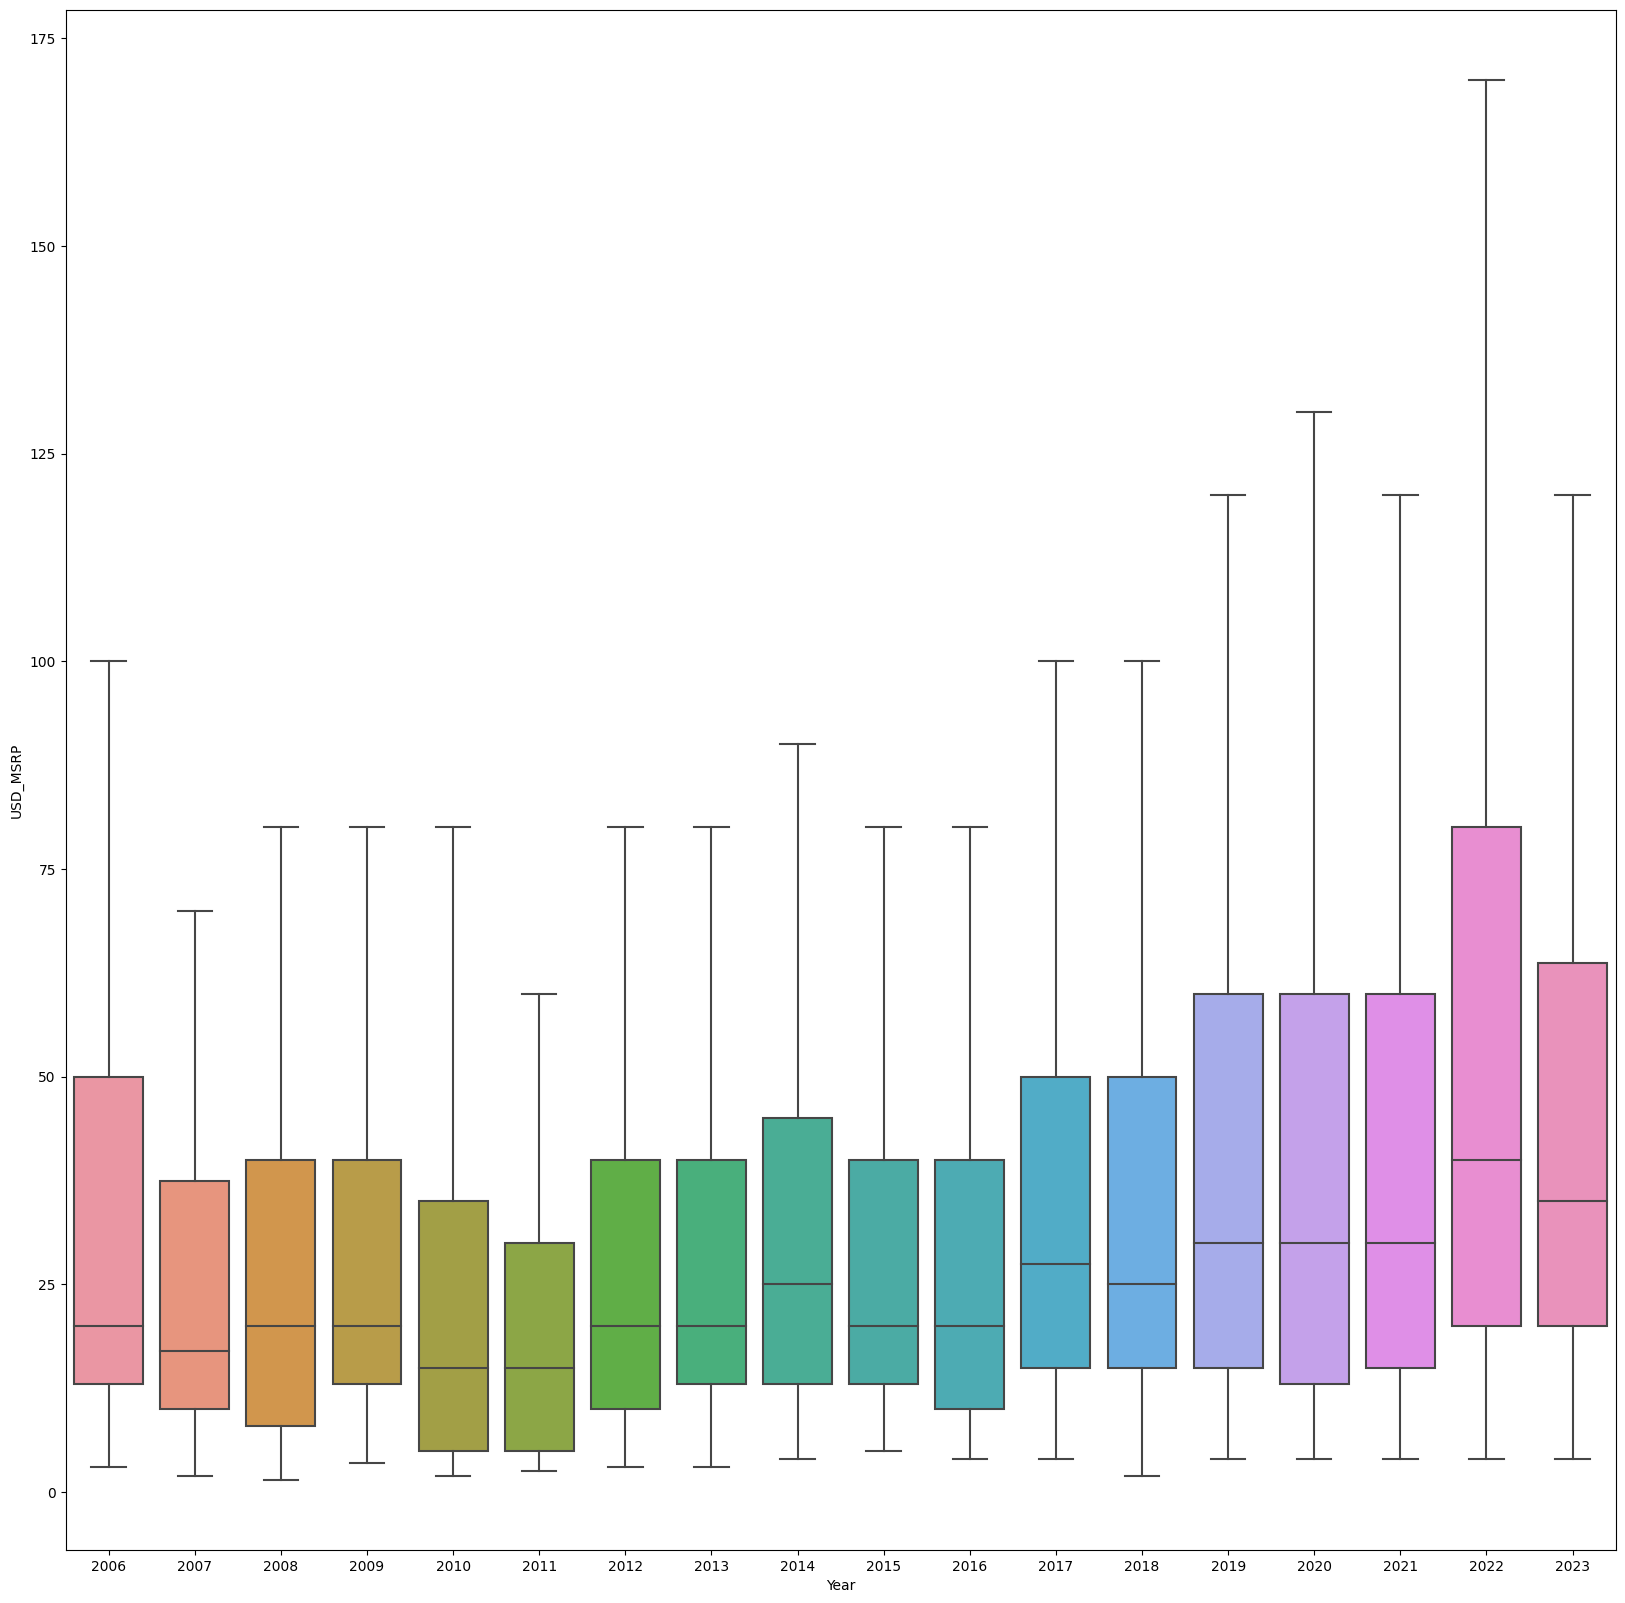

In [325]:
import seaborn as sns

# Filter the DataFrame
SETS_after_2005_df = LEGO_sets_df[LEGO_sets_df['Year'] > 2005]

# Make box plot of price grouped by year without outliers
plt.figure(figsize=(20,20))
sns.boxplot(x='Year', y='USD_MSRP', data=SETS_after_2005_df, showfliers=False)
plt.show()

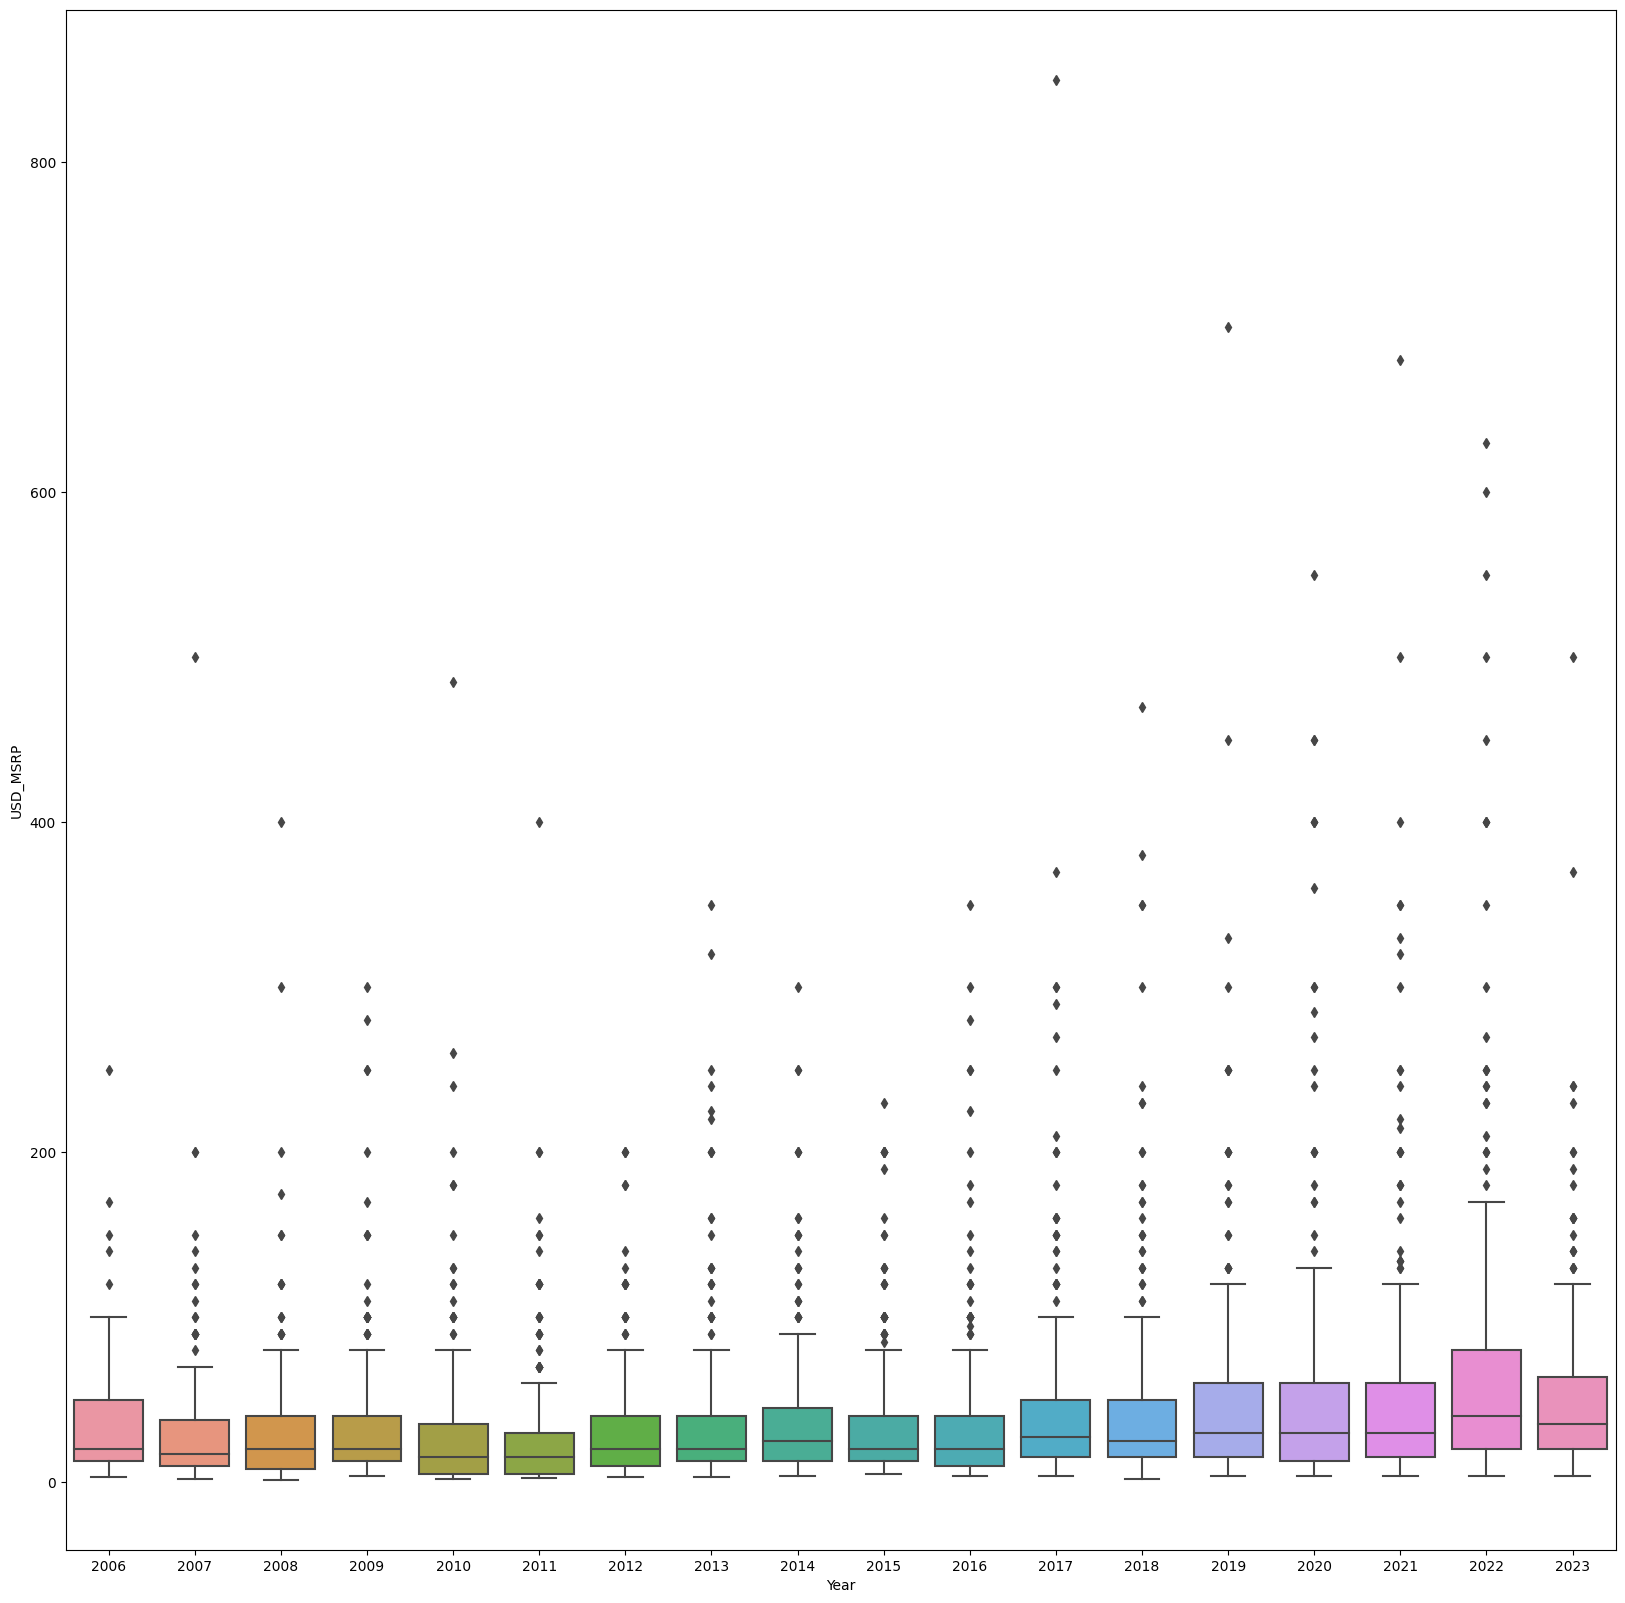

In [326]:
plt.figure(figsize=(20,20))
sns.boxplot(x='Year', y='USD_MSRP', data=SETS_after_2005_df, showfliers=True)
plt.show()

## Difference in price (retail - current)

<Axes: xlabel='Name'>

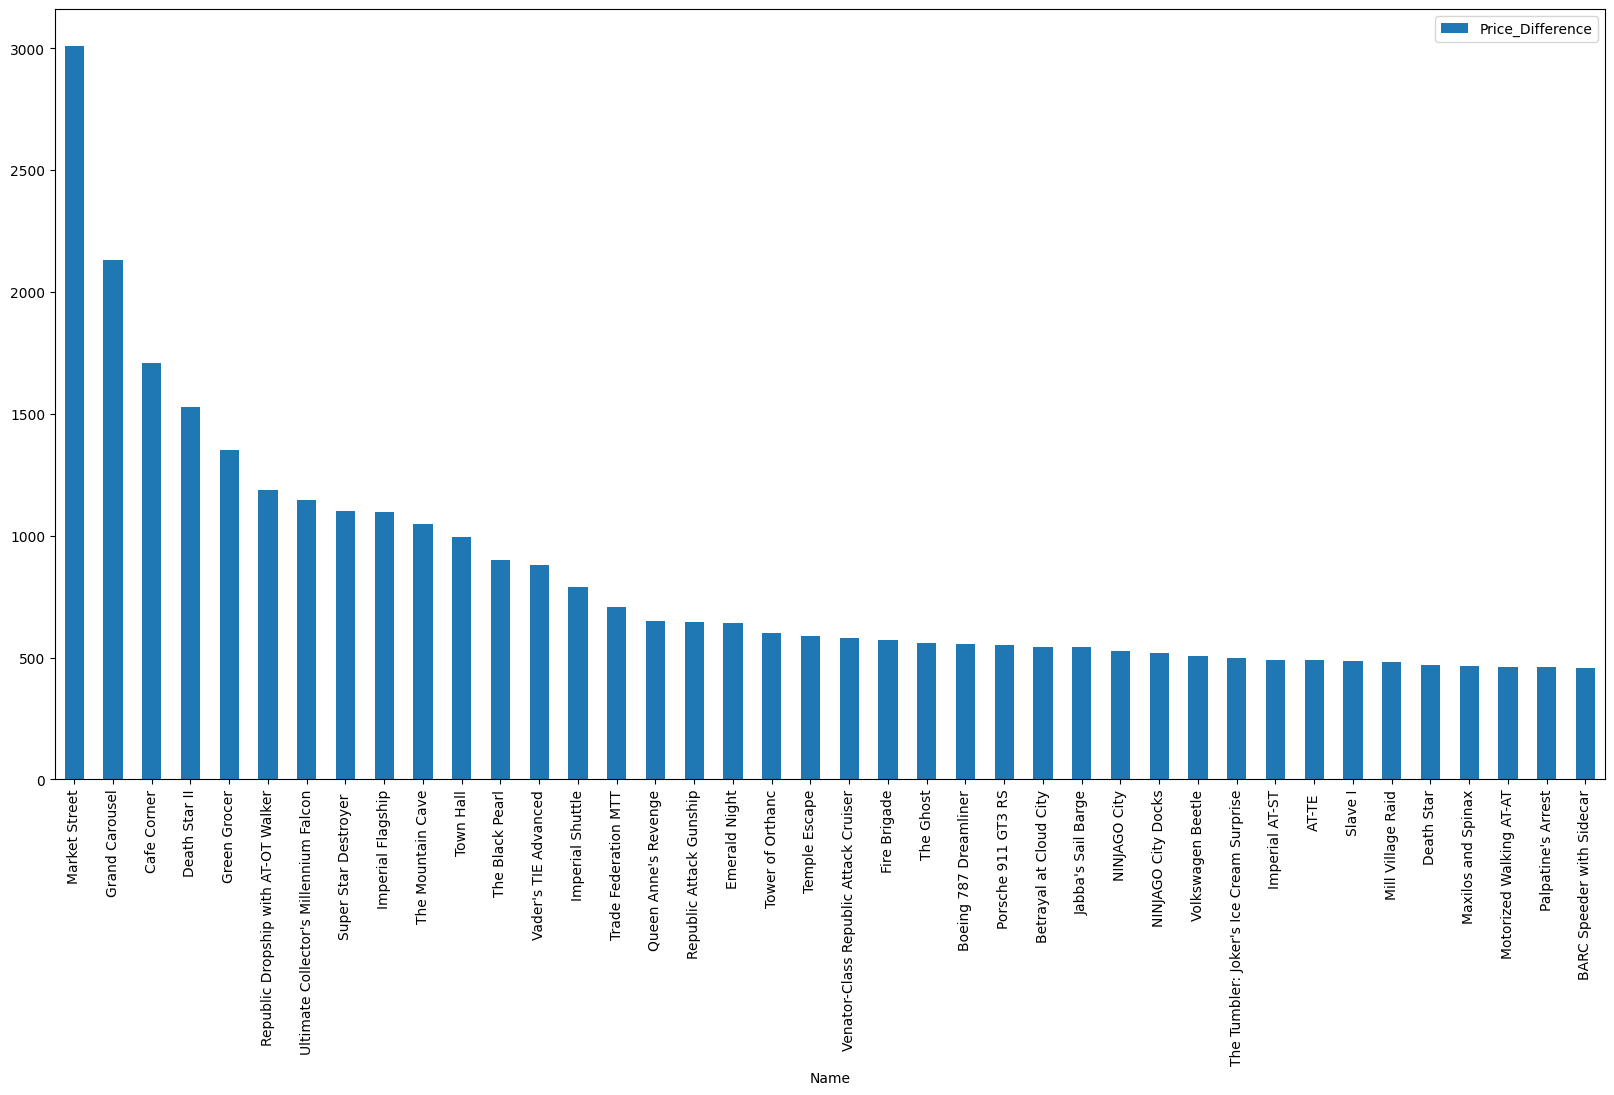

In [327]:
# show the 10 biggest differences between Current_Price and USD_MSRP

LEGO_sets_df['Price_Difference'] = LEGO_sets_df['Current_Price'] - LEGO_sets_df['USD_MSRP']
LEGO_sets_df.sort_values(by='Price_Difference', ascending=False).head(40).plot(x='Name', y='Price_Difference', kind='bar', figsize=(20,10))

In [328]:
LEGO_sets_df.sort_values(by='Price_Difference', ascending=False).head(10)

,Set_ID,Name,Year,Theme,Theme_Group,Subtheme,Category,Packaging,Num_Instructions,Availability,Pieces,Minifigures,Owned,Rating,USD_MSRP,Total_Quantity,Current_Price,Price_Difference
6787,10190-1,Market Street,2007,Advanced models,Model making,Modular Buildings Collection,Normal,Box,0,LEGO exclusive,1248.0,3.0,4627.0,4.3,89.99,2.0,3099.9900,3010.0000
7691,10196-1,Grand Carousel,2009,Advanced models,Model making,Fairground Collection,Normal,Box,2,LEGO exclusive,3263.0,9.0,2463.0,4.3,249.99,1.0,2380.7918,2130.8018
6785,10182-1,Cafe Corner,2007,Advanced models,Model making,Modular Buildings Collection,Normal,Box,2,LEGO exclusive,2056.0,3.0,7307.0,4.4,139.99,4.0,1850.0000,1710.0100
5973,10143-1,Death Star II,2005,Star Wars,Licensed,Ultimate Collector Series,Normal,Box,1,LEGO exclusive,3441.0,NaN,2884.0,4.4,269.99,6.0,1800.0000,1530.0100
7245,10185-1,Green Grocer,2008,Advanced models,Model making,Modular Buildings Collection,Normal,Box,3,LEGO exclusive,2352.0,4.0,9048.0,4.6,149.99,5.0,1500.0000,1350.0100
7690,10195-1,Republic Dropship with AT-OT Walker,2009,Star Wars,Licensed,The Clone Wars,Normal,Box,6,LEGO exclusive,1758.0,8.0,4187.0,4.5,249.99,3.0,1439.5109,1189.5209
6783,10179-1,Ultimate Collector's Millennium Falcon,2007,Star Wars,Licensed,Ultimate Collector Series,Normal,Box,1,LEGO exclusive,5197.0,5.0,4567.0,4.7,499.99,1.0,1645.9363,1145.9463
8724,10221-1,Super Star Destroyer,2011,Star Wars,Licensed,Ultimate Collector Series,Normal,Box,1,LEGO exclusive,3152.0,5.0,7640.0,4.4,399.99,9.0,1499.9900,1100.0000
8202,10210-1,Imperial Flagship,2010,Advanced models,Model making,Miscellaneous,Normal,Box,4,LEGO exclusive,1664.0,9.0,5433.0,4.6,179.99,7.0,1275.3740,1095.3840
11508,21137-1,The Mountain Cave,2017,Minecraft,Licensed,Minifig-scale,Normal,Box,2,LEGO exclusive,2863.0,6.0,915.0,4.4,249.99,1.0,1300.0000,1050.0100


The most expensive sets in terms of current price are those of Advanced models for model making or Star Wars Lego sets. Some of those of Star Wars theme are of Ultimate Collector Series. 

### Group by theme and subtheme

<Axes: xlabel='Theme'>

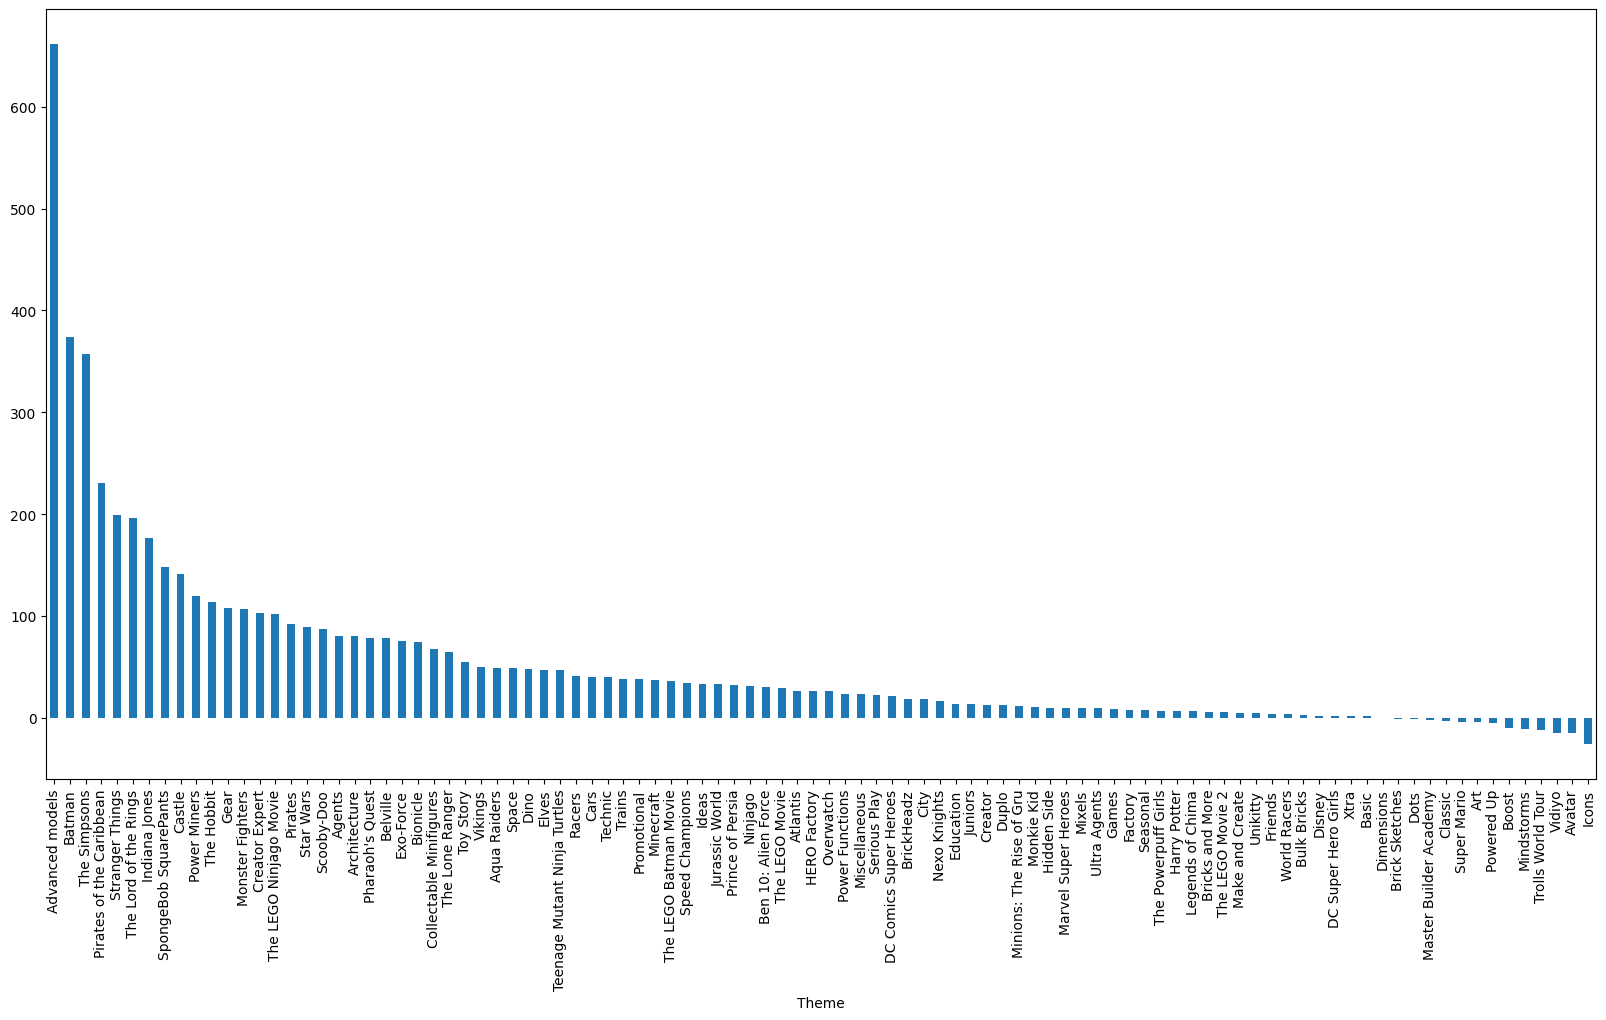

In [329]:
# average Price_Difference per Theme where Price_Difference is not NaN

LEGO_sets_df[LEGO_sets_df['Price_Difference'].notnull()].groupby('Theme')['Price_Difference'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(20,10))

In [330]:
LEGO_sets_df[LEGO_sets_df['Price_Difference'].notnull()].groupby('Theme')['Price_Difference'].mean().sort_values(ascending=False).head(20)

Theme
Advanced models             661.415350
Batman                      373.755000
The Simpsons                356.948100
Pirates of the Caribbean    230.906340
Stranger Things             199.010000
The Lord of the Rings       196.404233
Indiana Jones               176.264272
SpongeBob SquarePants       148.369469
Castle                      140.786971
Power Miners                119.549660
The Hobbit                  113.654057
Gear                        108.310633
Monster Fighters            107.230378
Creator Expert              103.236677
The LEGO Ninjago Movie      101.677461
Pirates                      91.980257
Star Wars                    88.782686
Scooby-Doo                   87.148920
Agents                       80.796662
Architecture                 80.169120
Name: Price_Difference, dtype: float64

<Axes: xlabel='Theme,Subtheme'>

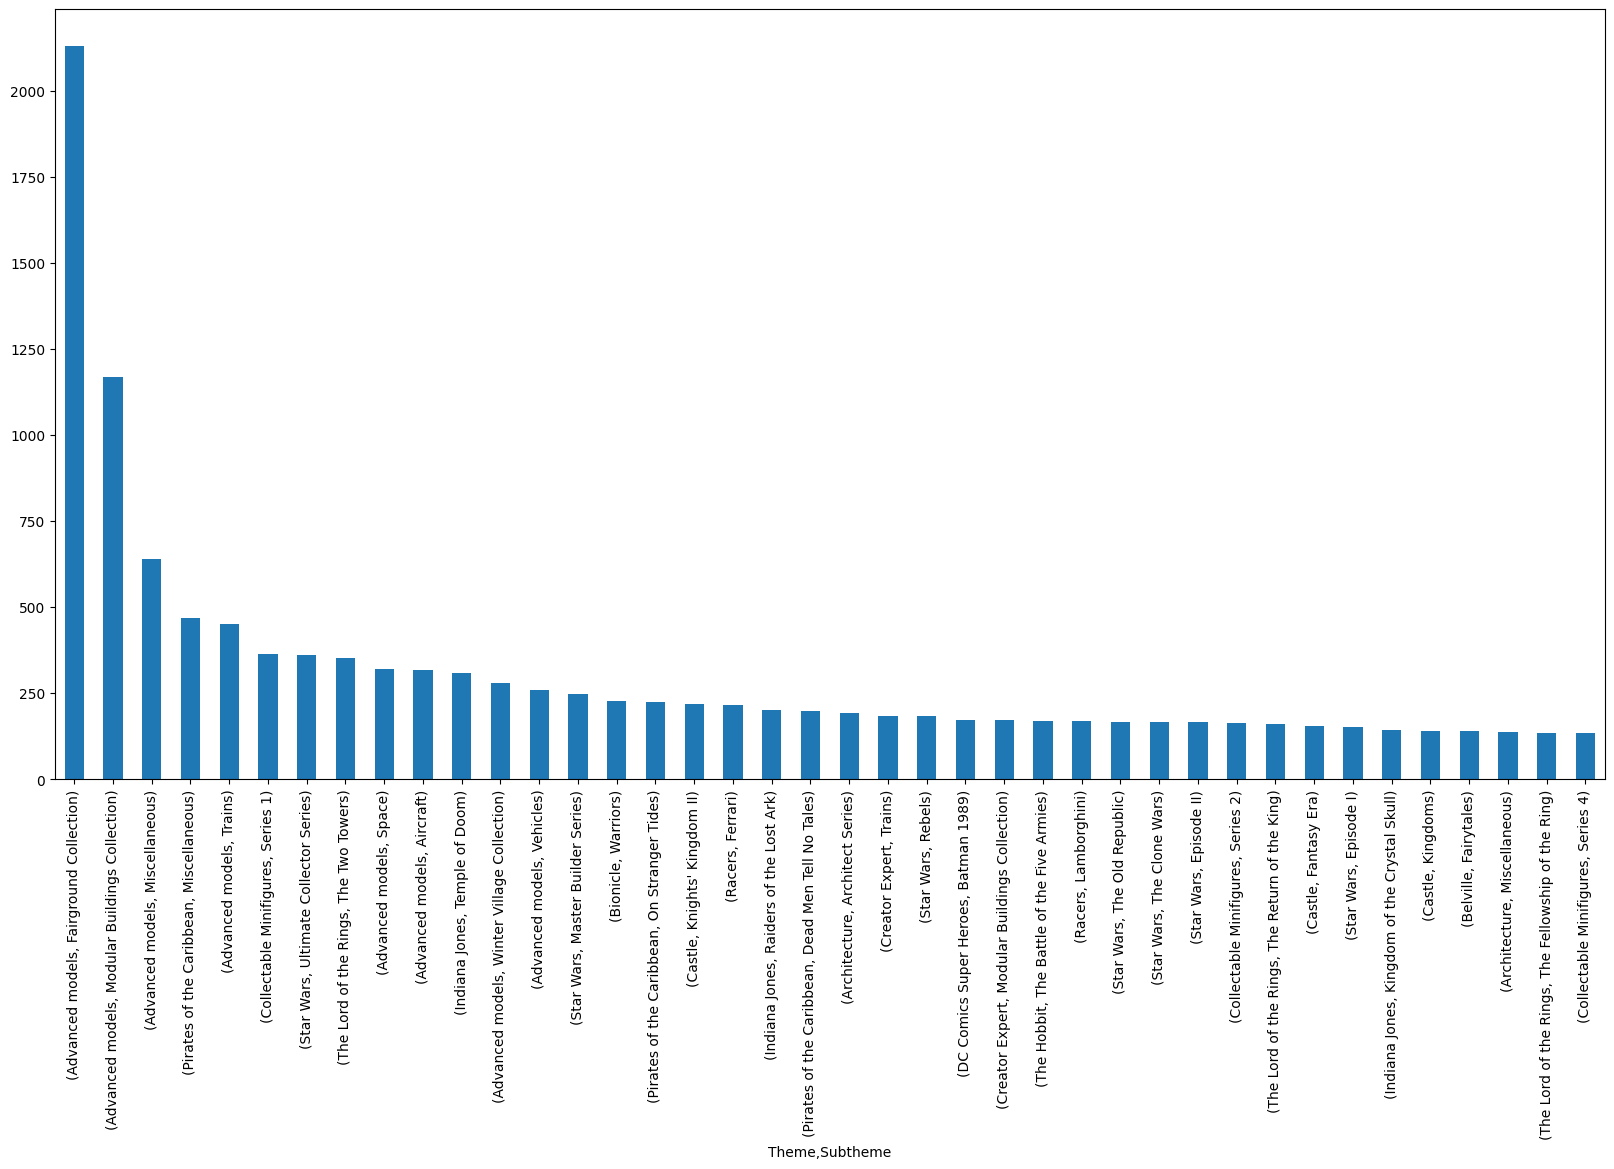

In [331]:
# average Price_Difference per Subtheme where Price_Difference is not NaN and show their Subtheme and Theme

LEGO_sets_df[LEGO_sets_df['Price_Difference'].notnull()].groupby(['Theme', 'Subtheme'])['Price_Difference'].mean().sort_values(ascending=False).head(40).plot(kind='bar', figsize=(20,10))

In [332]:
LEGO_sets_df[LEGO_sets_df['Price_Difference'].notnull()].groupby(['Theme', 'Subtheme'])['Price_Difference'].mean().sort_values(ascending=False).head(20)

Theme                     Subtheme                    
Advanced models           Fairground Collection           2130.801800
                          Modular Buildings Collection    1168.470300
                          Miscellaneous                    640.672550
Pirates of the Caribbean  Miscellaneous                    467.505000
Advanced models           Trains                           451.081600
Collectable Minifigures   Series 1                         363.010000
Star Wars                 Ultimate Collector Series        362.457931
The Lord of the Rings     The Two Towers                   353.786533
Advanced models           Space                            319.980000
                          Aircraft                         317.510000
Indiana Jones             Temple of Doom                   309.510000
Advanced models           Winter Village Collection        279.818650
                          Vehicles                         260.010000
Star Wars                 Master Bu

## Difference in price percentage (retail - current)

<Axes: xlabel='Name'>

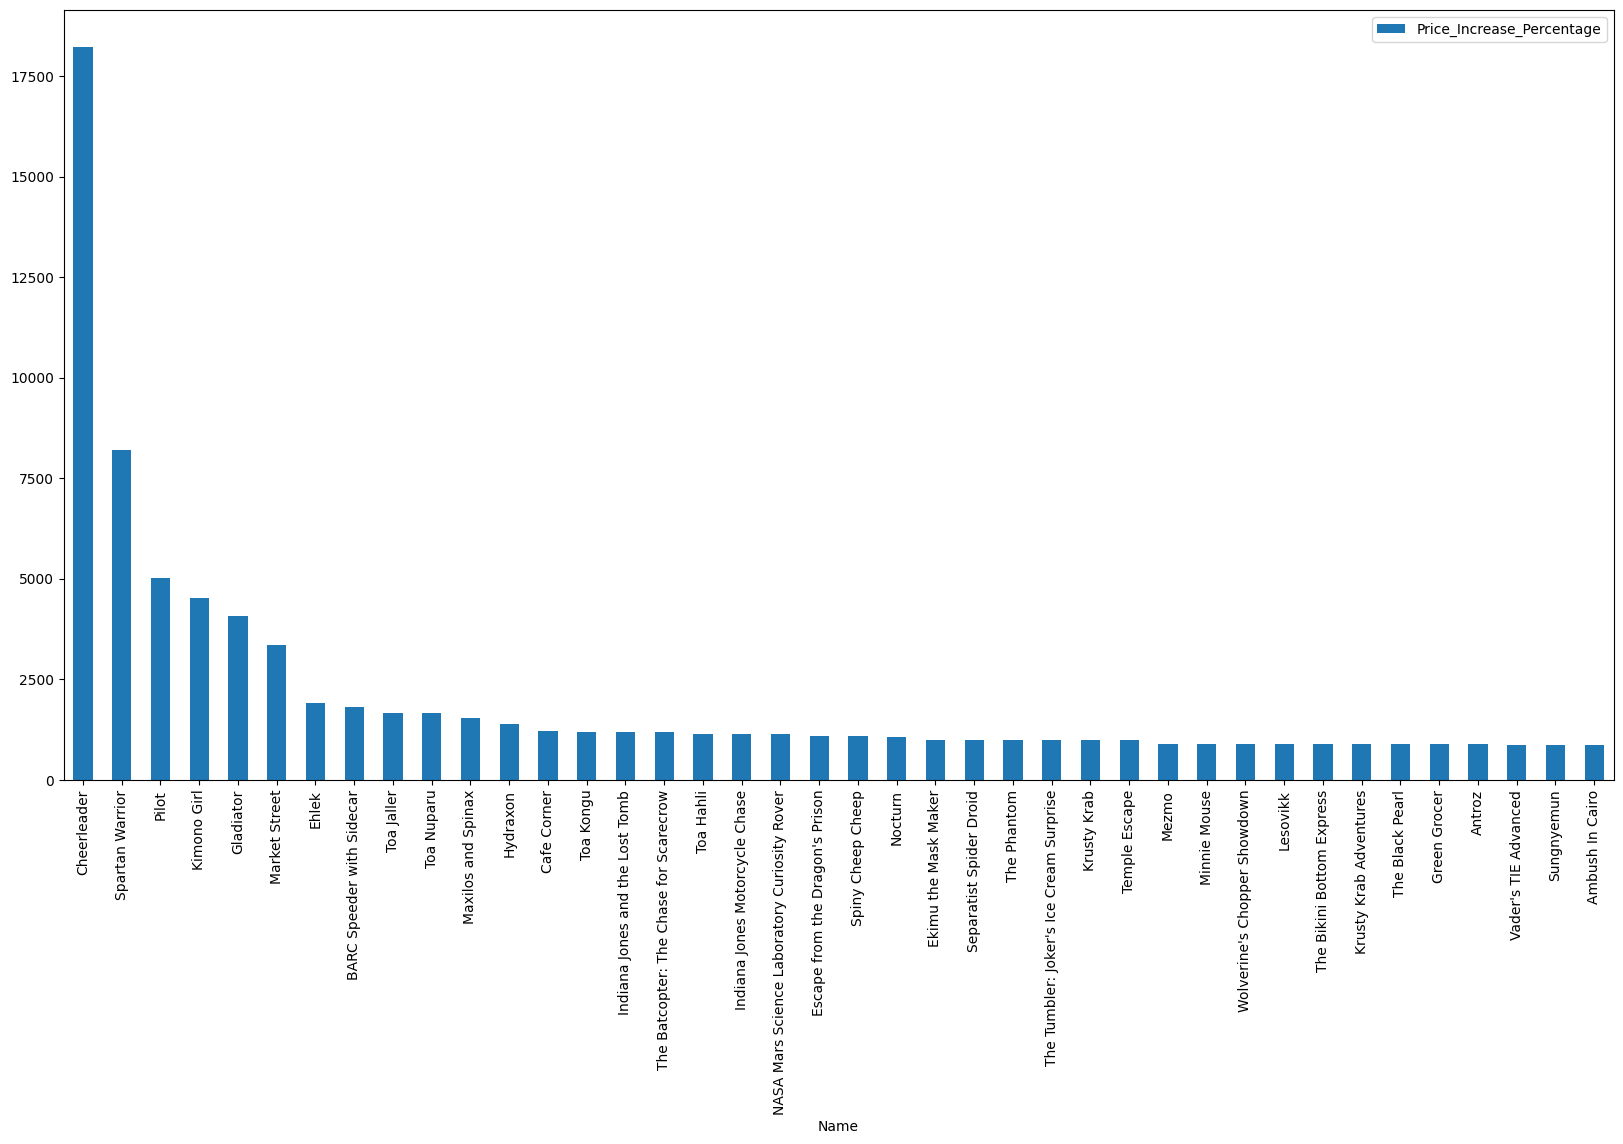

In [333]:
# Add a new column for the price increase percentage
LEGO_sets_df['Price_Increase_Percentage'] = (LEGO_sets_df['Price_Difference'] / LEGO_sets_df['USD_MSRP']) * 100

# Show the 10 biggest differences between Current_Price and USD_MSRP
LEGO_sets_df.sort_values(by='Price_Increase_Percentage', ascending=False).head(40).plot(x='Name', y='Price_Increase_Percentage', kind='bar', figsize=(20,10))

In [334]:
LEGO_sets_df.sort_values(by='Price_Increase_Percentage', ascending=False).head(20)

,Set_ID,Name,Year,Theme,Theme_Group,Subtheme,Category,Packaging,Num_Instructions,Availability,Pieces,Minifigures,Owned,Rating,USD_MSRP,Total_Quantity,Current_Price,Price_Difference,Price_Increase_Percentage
8138,8683-2,Cheerleader,2010,Collectable Minifigures,Miscellaneous,Series 1,Normal,Foil pack,0,Retail,7.0,1.0,6985.0,3.8,1.99,7.0,365.0000,363.0100,18241.708543
8157,8684-2,Spartan Warrior,2010,Collectable Minifigures,Miscellaneous,Series 2,Normal,Foil pack,0,Retail,8.0,1.0,7312.0,4.4,1.99,5.0,165.1400,163.1500,8198.492462
8657,8803-2,Pilot,2011,Collectable Minifigures,Miscellaneous,Series 3,Normal,Foil pack,0,Retail,7.0,1.0,8532.0,3.5,2.99,5.0,153.4500,150.4600,5032.107023
8676,8804-2,Kimono Girl,2011,Collectable Minifigures,Miscellaneous,Series 4,Normal,Foil pack,0,Retail,6.0,1.0,9722.0,4.0,2.99,3.0,138.6000,135.6100,4535.451505
8695,8805-2,Gladiator,2011,Collectable Minifigures,Miscellaneous,Series 5,Normal,Foil pack,0,Retail,7.0,1.0,9235.0,4.1,2.99,1.0,125.0000,122.0100,4080.602007
6787,10190-1,Market Street,2007,Advanced models,Model making,Modular Buildings Collection,Normal,Box,0,LEGO exclusive,1248.0,3.0,4627.0,4.3,89.99,2.0,3099.9900,3010.0000,3344.816091
6749,8920-1,Ehlek,2007,Bionicle,Constraction,Barraki,Normal,{Not specified},2,{Not specified},54.0,NaN,2836.0,4.0,9.99,2.0,200.0000,190.0100,1902.002002
9850,75012-1,BARC Speeder with Sidecar,2013,Star Wars,Licensed,The Clone Wars,Normal,Box,2,Retail - limited,226.0,4.0,7574.0,4.2,24.99,12.0,480.0758,455.0858,1821.071629
6740,8911-1,Toa Jaller,2007,Bionicle,Constraction,Toa Mahri,Normal,{Not specified},1,{Not specified},68.0,NaN,2725.0,4.4,9.99,1.0,175.0000,165.0100,1651.751752
6742,8913-1,Toa Nuparu,2007,Bionicle,Constraction,Toa Mahri,Normal,{Not specified},1,{Not specified},59.0,NaN,2380.0,4.3,9.99,2.0,175.0000,165.0100,1651.751752


### Group by theme and subtheme

<Axes: xlabel='Theme'>

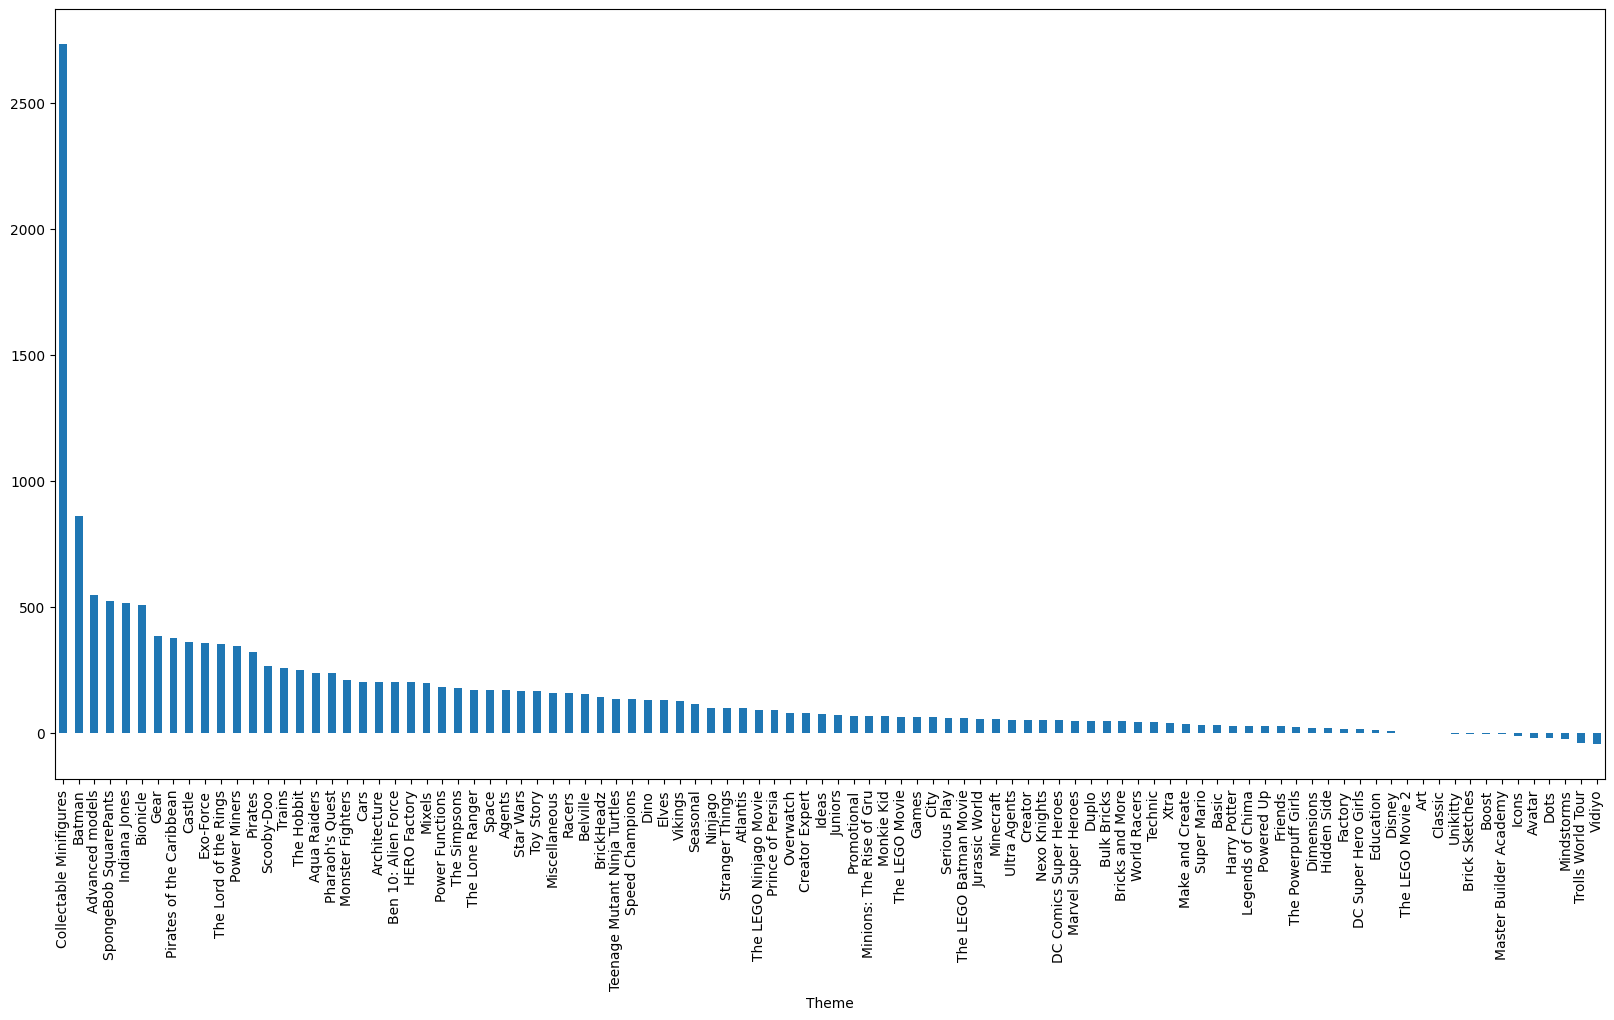

In [335]:
# average Price_Increase_Percentage per Theme where Price_Increase_Percentage is not NaN

LEGO_sets_df[LEGO_sets_df['Price_Increase_Percentage'].notnull()].groupby('Theme')['Price_Increase_Percentage'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(20,10))

In [336]:
LEGO_sets_df[LEGO_sets_df['Price_Increase_Percentage'].notnull()].groupby('Theme')['Price_Increase_Percentage'].mean().sort_values(ascending=False).head(20)

Theme
Collectable Minifigures     2733.427687
Batman                       860.656198
Advanced models              547.904113
SpongeBob SquarePants        523.954292
Indiana Jones                513.451205
Bionicle                     506.624569
Gear                         383.438395
Pirates of the Caribbean     374.684796
Castle                       361.108968
Exo-Force                    355.073437
The Lord of the Rings        350.872556
Power Miners                 342.624485
Pirates                      319.971219
Scooby-Doo                   264.948594
Trains                       255.592978
The Hobbit                   248.320772
Aqua Raiders                 238.140152
Pharaoh's Quest              234.867148
Monster Fighters             207.985709
Cars                         202.896958
Name: Price_Increase_Percentage, dtype: float64

## Number of pieces in a set per year

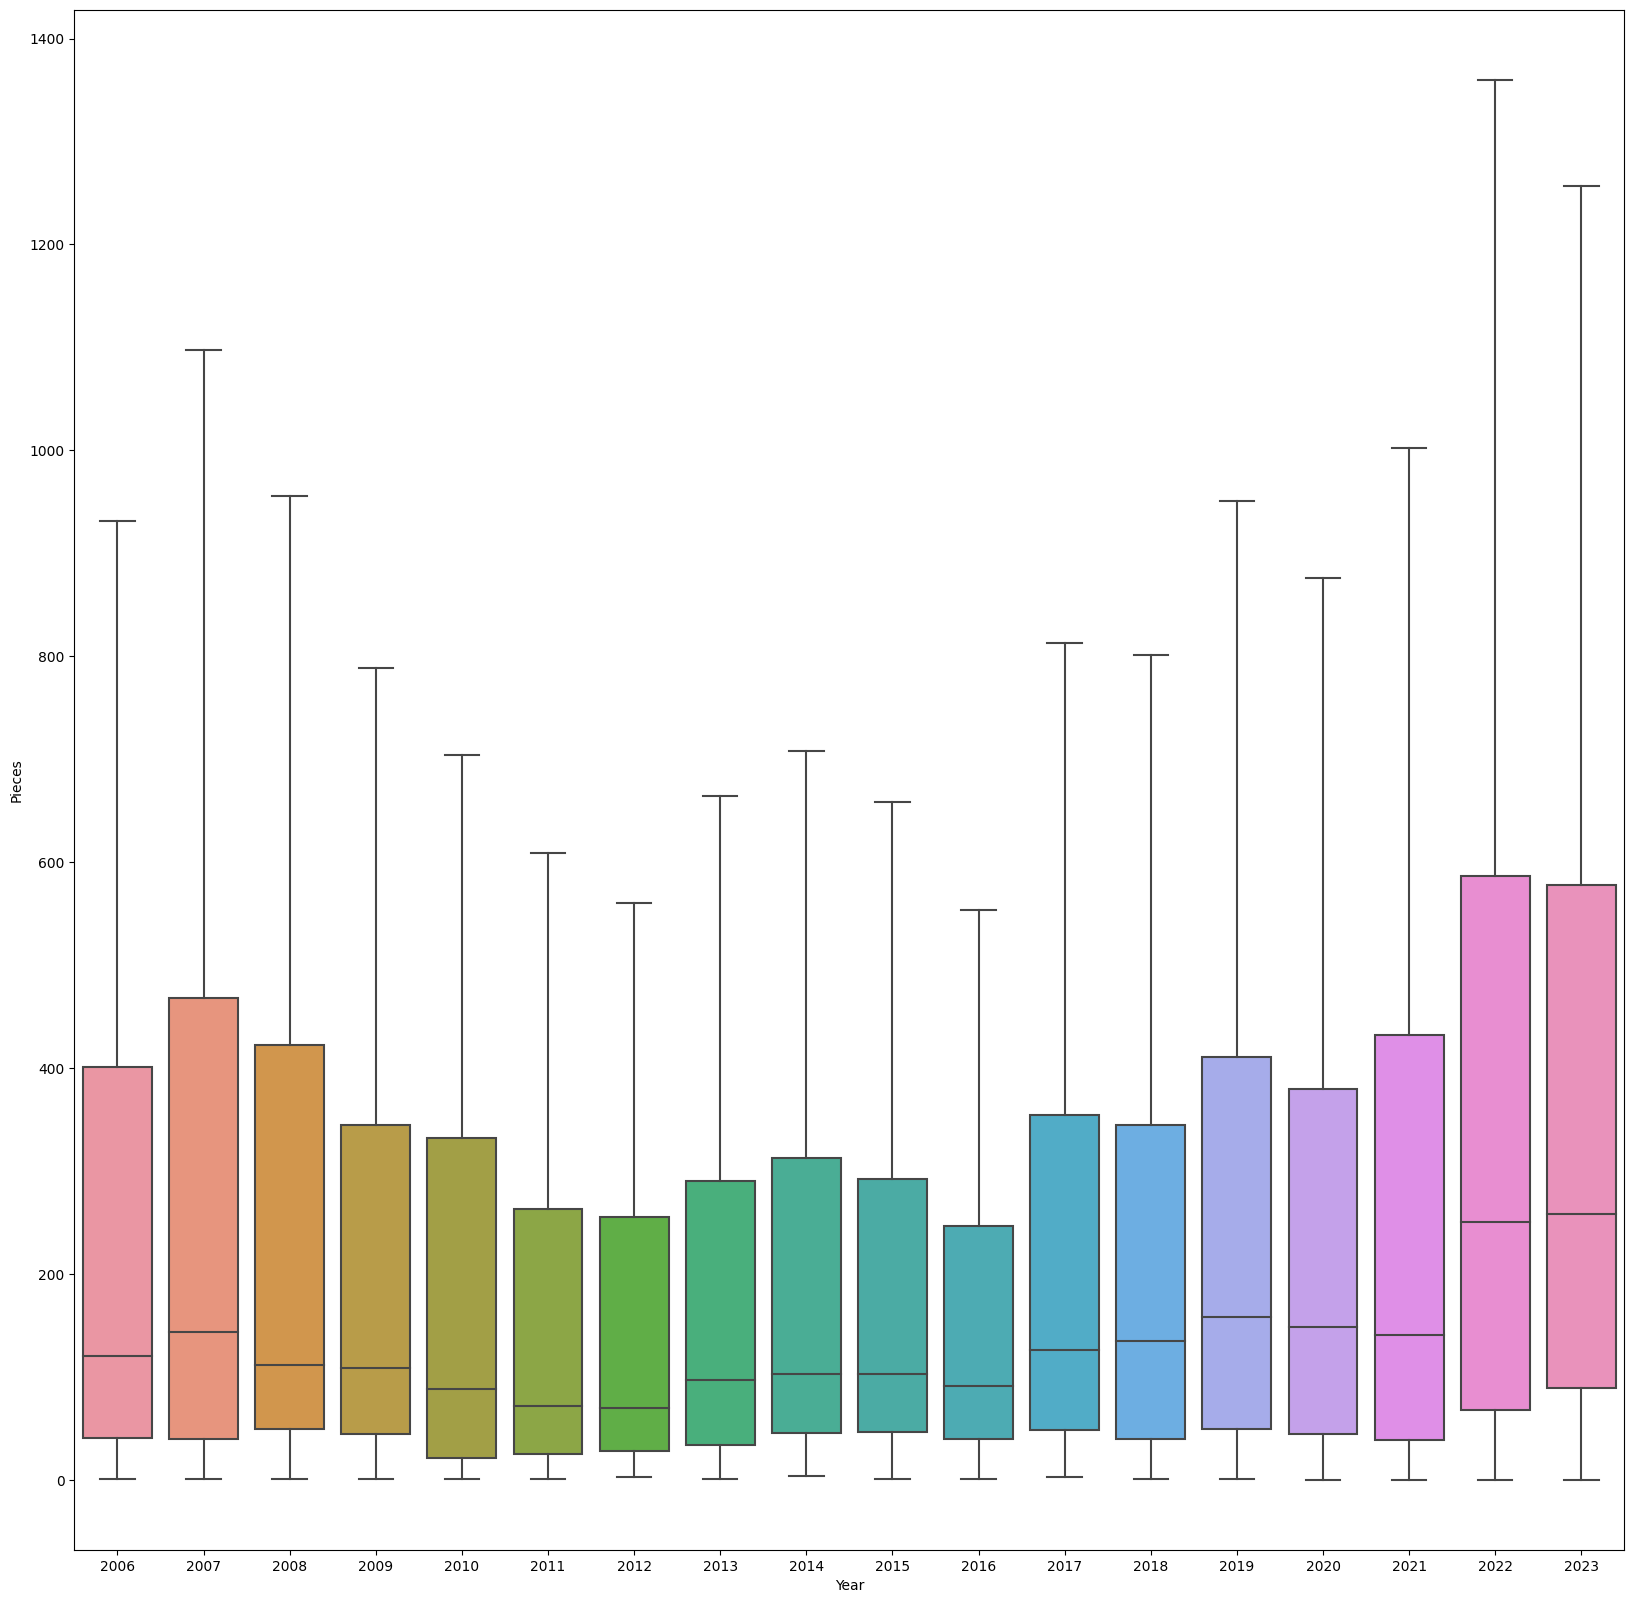

In [337]:
# Make box plot of pieces grouped by year without outliers
plt.figure(figsize=(20,20))
sns.boxplot(x='Year', y='Pieces', data=SETS_after_2005_df, showfliers=False)
plt.show()

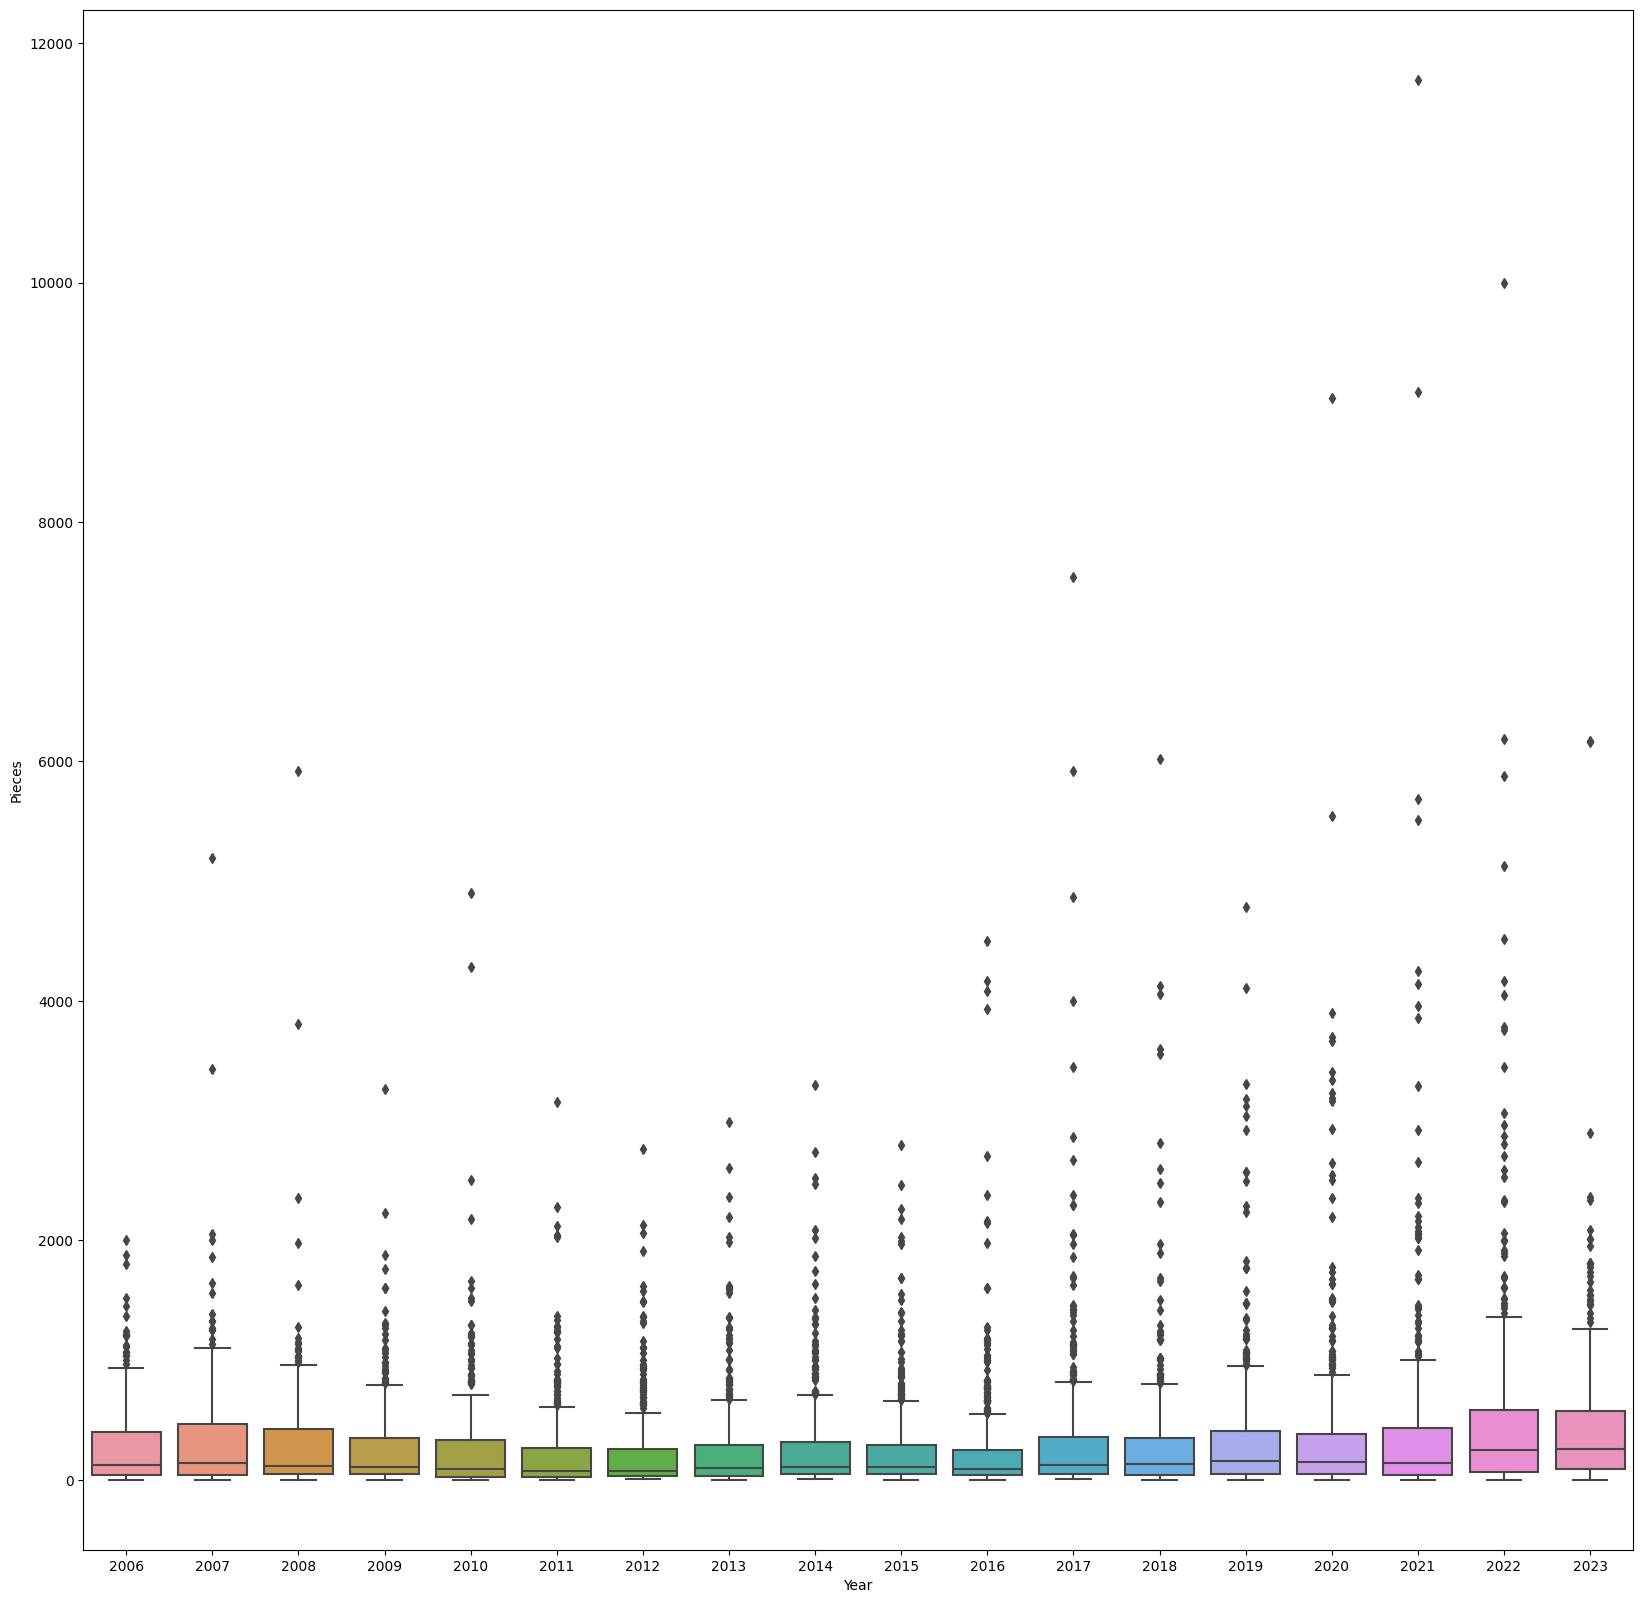

In [338]:
plt.figure(figsize=(20,20))
sns.boxplot(x='Year', y='Pieces', data=SETS_after_2005_df, showfliers=True)
plt.show()

## Adjusting prices of sets (USD_MSRP) for inflation

Deflation of the USD_MSRP

We will do it based on 2022 dollars

In [339]:
import cpi

# Updating the CPI

# Since the BLS routinely releases new CPI new values, this library must periodically download the latest data. 
# This library does not do this automatically. You must update the BLS dataset stored alongside the code yourself 
# by running the following method:

# This takes some time, only need to do it once
# cpi.update()

In [340]:
# Create a new column for the price in 2022 dollars
SETS_after_2005_df['USD_MSRP_adjusted_2022'] = SETS_after_2005_df.apply(lambda row: row['USD_MSRP'] if row['Year'] == 2023 else cpi.inflate(row['USD_MSRP'], row['Year'], to=2022), axis=1)

# the CPI library does not have any data for 2023, so we will use 2022 instead
# so we have to adjust 2023 prices to 2022 prices
# the CPI for 2023 is predicted to be 3.3% higher than 2022

# In the row with Year = 2023 multiply USD_MSRP_adjusted_2022 with 0.967
SETS_after_2005_df['USD_MSRP_adjusted_2022'] = SETS_after_2005_df.apply(lambda row: row['USD_MSRP_adjusted_2022'] * 0.967 if row['Year'] == 2023 else row['USD_MSRP_adjusted_2022'], axis=1)

/tmp/ipykernel_9864/3136512757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SETS_after_2005_df['USD_MSRP_adjusted_2022'] = SETS_after_2005_df.apply(lambda row: row['USD_MSRP'] if row['Year'] == 2023 else cpi.inflate(row['USD_MSRP'], row['Year'], to=2022), axis=1)
/tmp/ipykernel_9864/3136512757.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SETS_after_2005_df['USD_MSRP_adjusted_2022'] = SETS_after_2005_df.apply(lambda row: row['USD_MSRP_adjusted_2022'] * 0.967 if row['Year'] == 2023 else row['USD

### Comparison of prices of sets per year

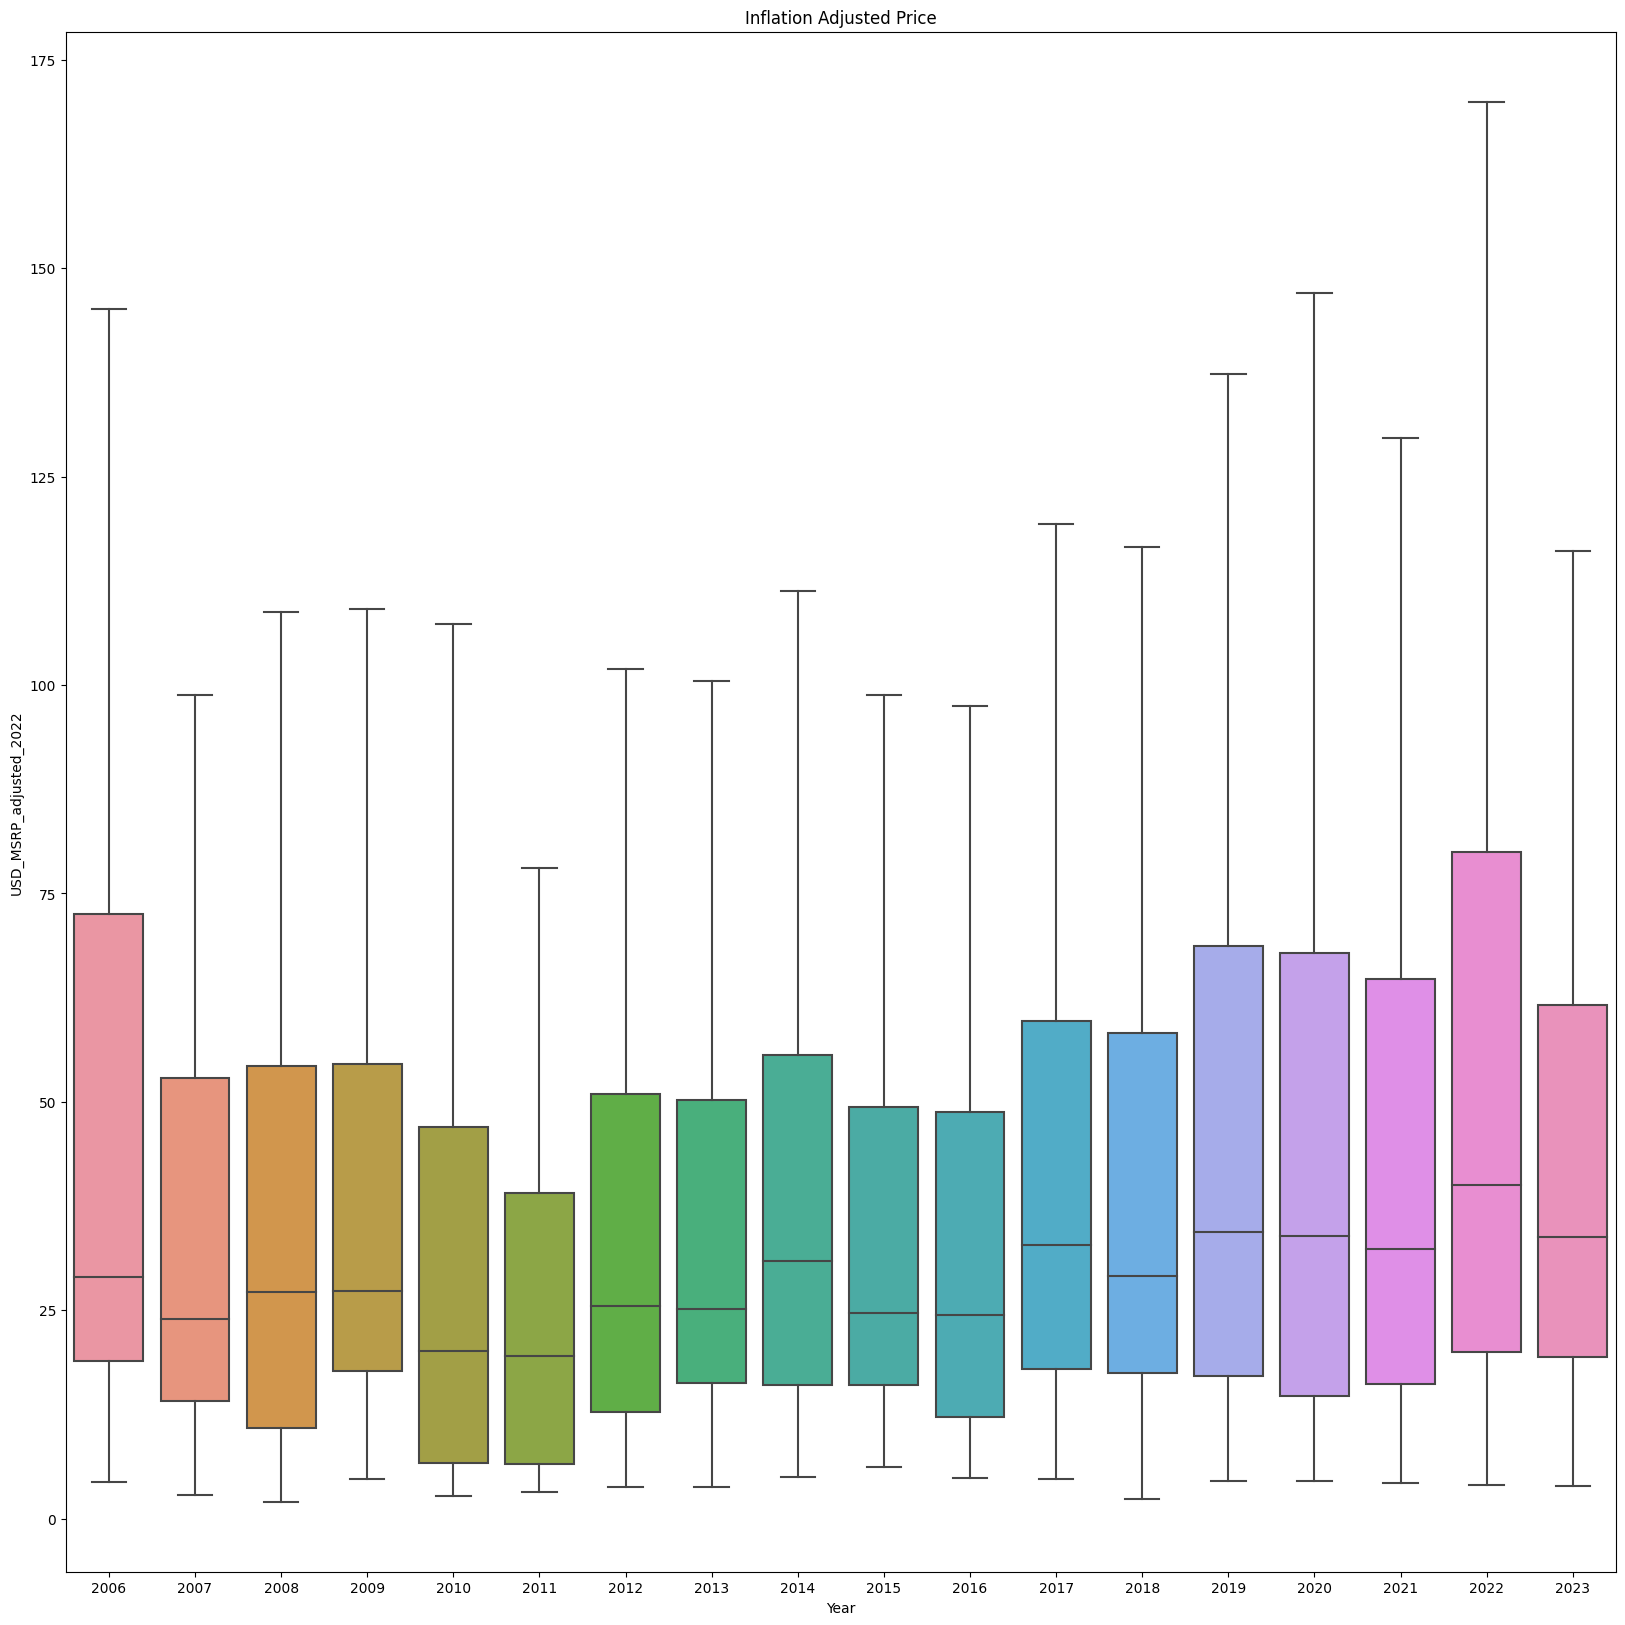

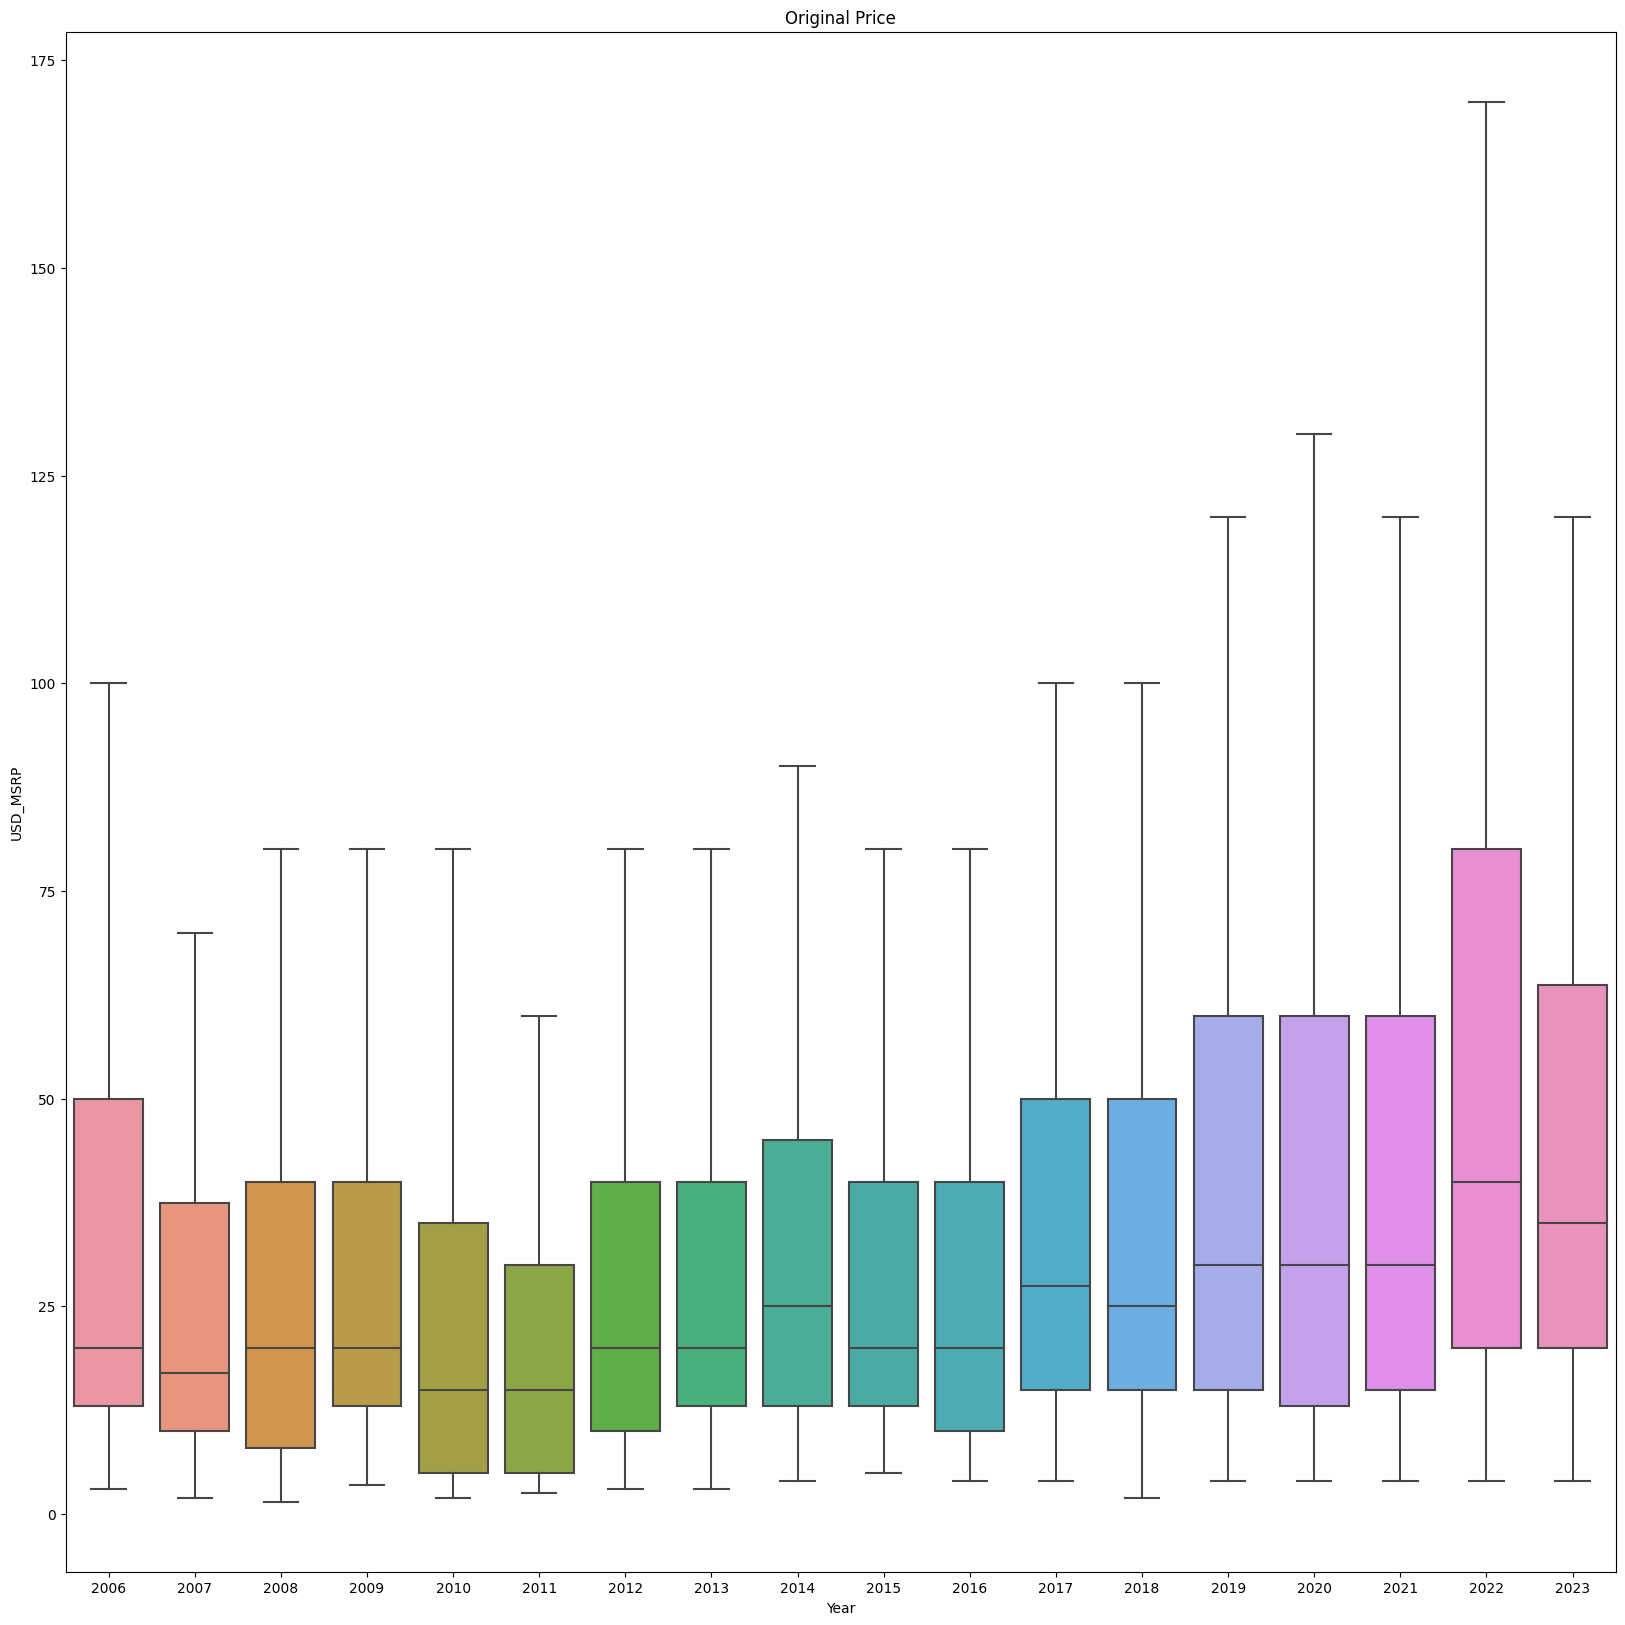

In [341]:
# Make box plot of inflation adjusted price grouped by year without outliers
plt.figure(figsize=(20,20))
sns.boxplot(x='Year', y='USD_MSRP_adjusted_2022', data=SETS_after_2005_df, showfliers=False)
plt.title('Inflation Adjusted Price')
plt.show()

plt.figure(figsize=(20,20))
sns.boxplot(x='Year', y='USD_MSRP', data=SETS_after_2005_df, showfliers=False)
plt.title('Original Price')
plt.show()

### Comparison of prices of a piece per year

/tmp/ipykernel_9864/3667414680.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Price_Per_Piece'] = filtered_df['USD_MSRP'] / filtered_df['Pieces']
/tmp/ipykernel_9864/3667414680.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Price_Per_Piece_Adjusted'] = filtered_df['USD_MSRP_adjusted_2022'] / filtered_df['Pieces']


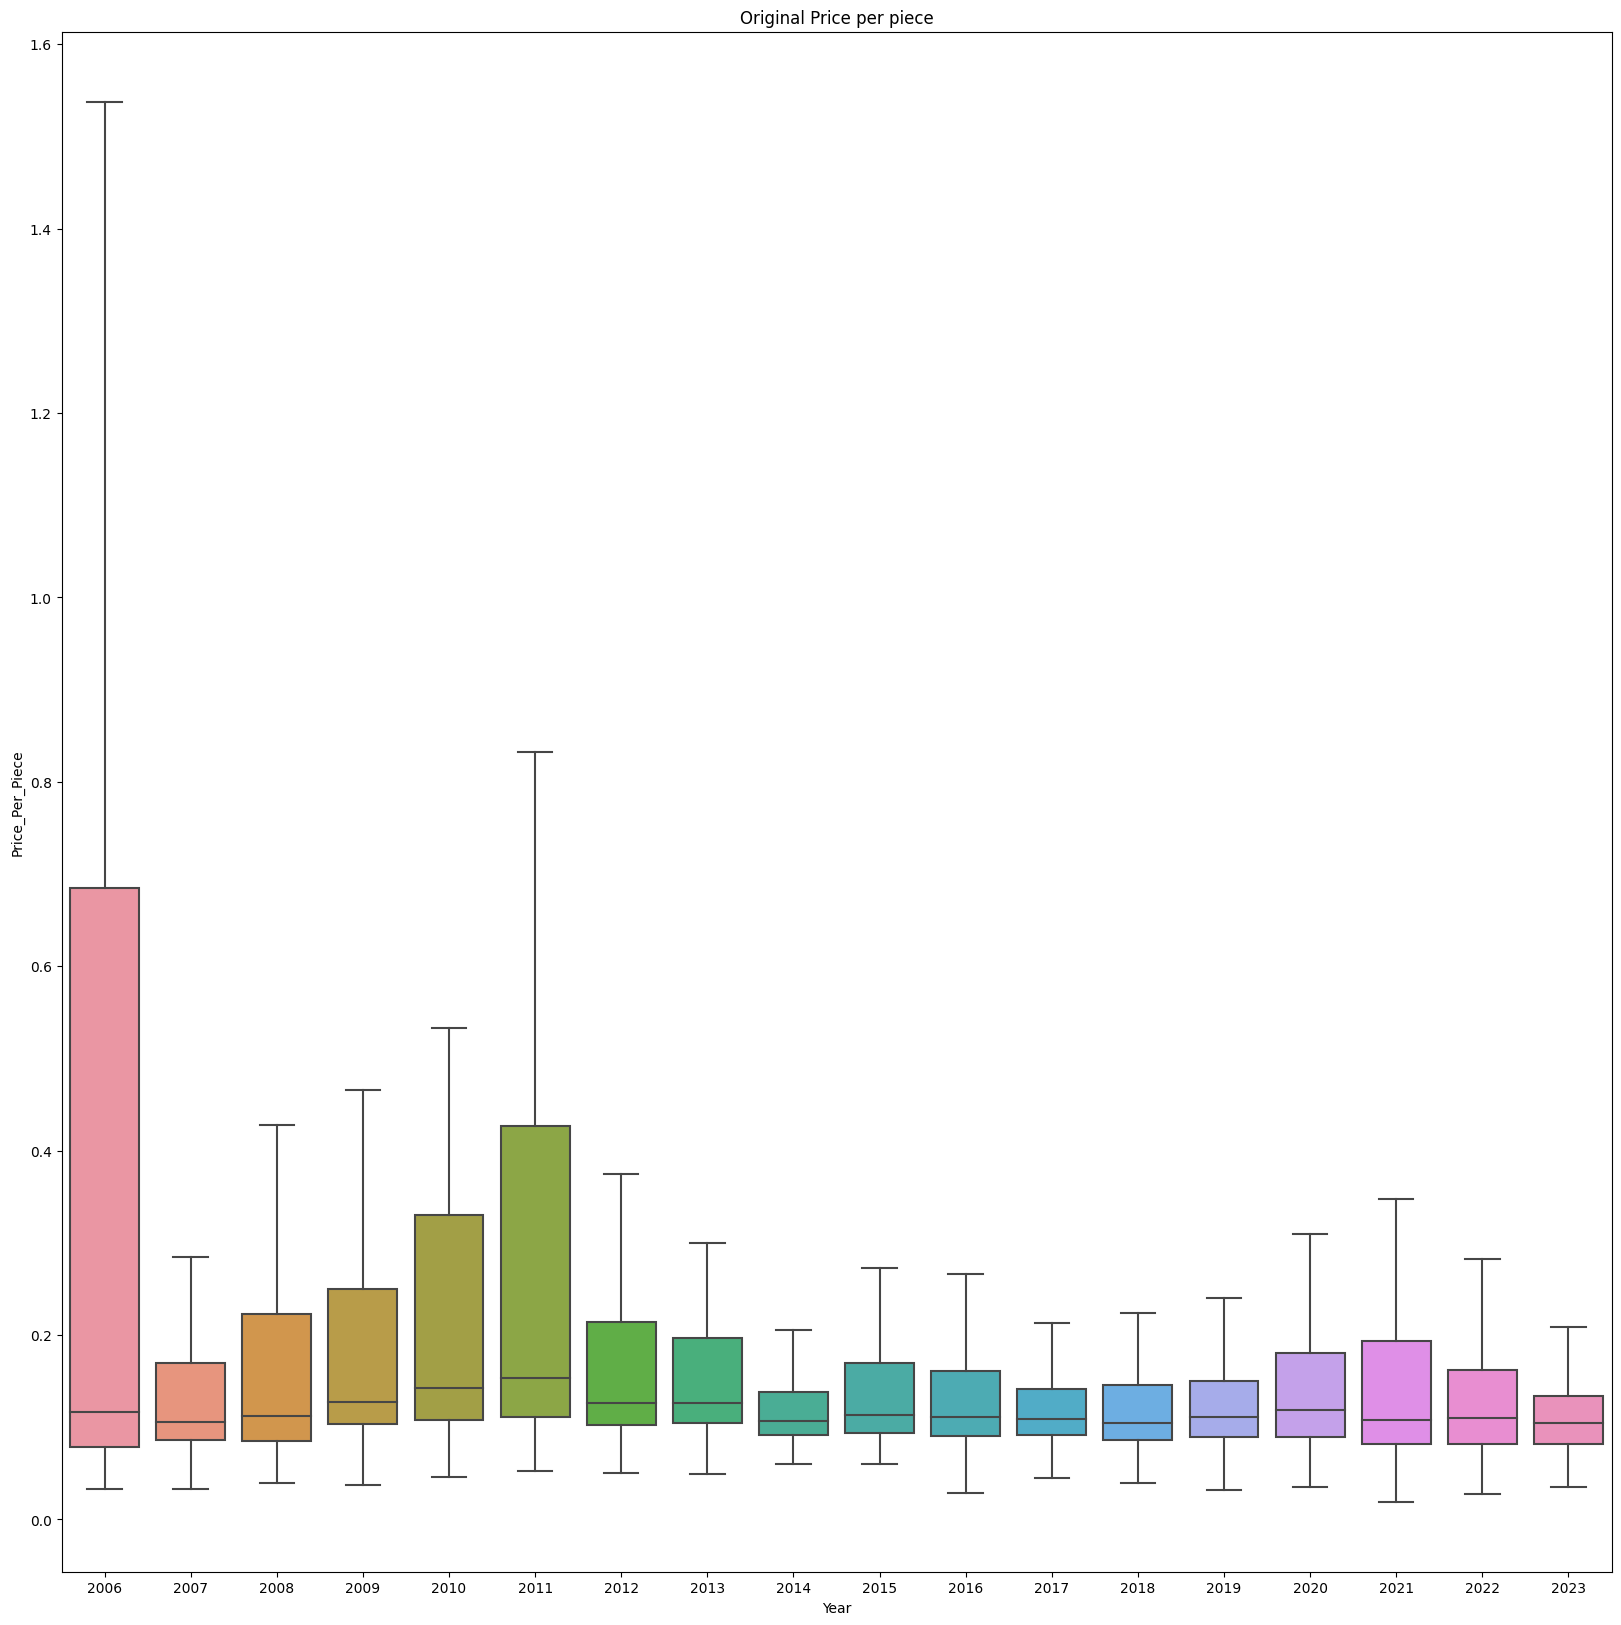

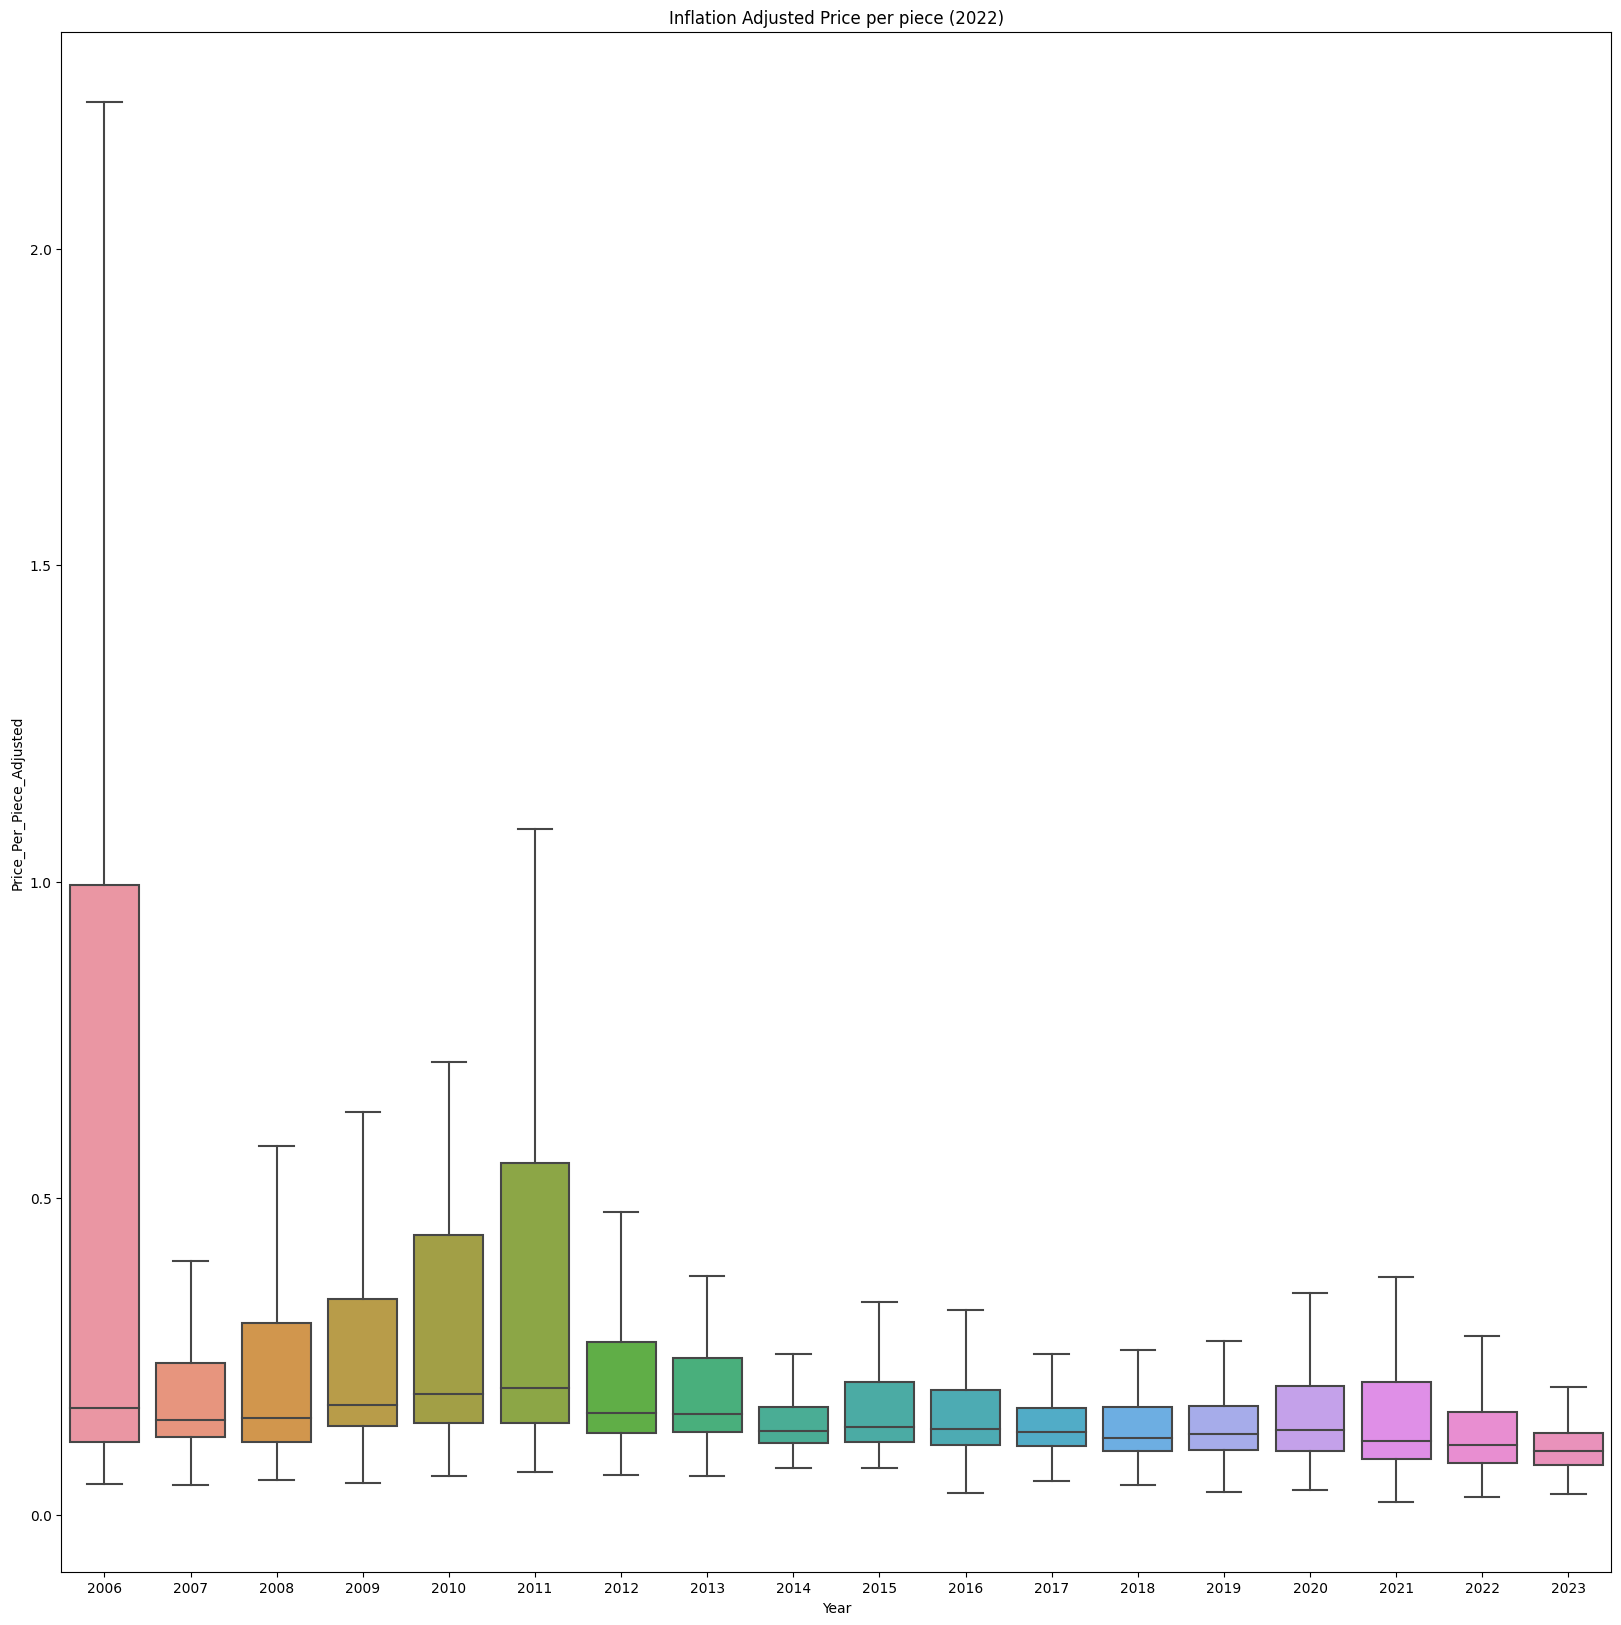

In [342]:
# filter to only have rows with Pieces > 0 and USD_MSRP > 0

filtered_df = SETS_after_2005_df[(SETS_after_2005_df['Pieces'] > 0) & (SETS_after_2005_df['USD_MSRP'] > 0)]

# price for one Piece
filtered_df['Price_Per_Piece'] = filtered_df['USD_MSRP'] / filtered_df['Pieces']
filtered_df['Price_Per_Piece_Adjusted'] = filtered_df['USD_MSRP_adjusted_2022'] / filtered_df['Pieces']

plt.figure(figsize=(20,20))
sns.boxplot(x='Year', y='Price_Per_Piece', data=filtered_df, showfliers=False)
plt.title('Original Price per piece')
plt.show()

plt.figure(figsize=(20,20))
sns.boxplot(x='Year', y='Price_Per_Piece_Adjusted', data=filtered_df, showfliers=False)
plt.title('Inflation Adjusted Price per piece (2022)')
plt.show()

We can see that when looking at prices per set each year, both before and after adjustment for inflation, the mean price has the tendency of going up each year. 

However, when looking at price per piece, the price seems to be stagnating without adjustment for inflation, and going down with adjusting. For 2006, we have roughly half as many sets with a stated price, as any of the other next years. That could be the explanation why, 2006 seems to be an outlier for price per piece. 

There can be many possible reasons to explain the peak in 2011. One of them could be, that LEGO patent expired in 2011, allowing othr companies to produce LEGO-like products. Another reason could be, that the strategies of LEGO as a company changed over years, concerning LEGO amusement parks introduction in 2004, change of number of colours of bricks, change of shapes of bricks, etc. As any other company, LEGO went through changes that could have affected the price of their products.

# Collectable minifigues

In [343]:
# show all the sets where the Theme is 'Collectable Minifigures'

LEGO_sets_df[LEGO_sets_df['Theme'] == 'Collectable Minifigures'].count()

Set_ID                       804
Name                         804
Year                         804
Theme                        804
Theme_Group                  804
Subtheme                     804
Category                     804
Packaging                    804
Num_Instructions             804
Availability                 804
Pieces                       722
Minifigures                  713
Owned                        804
Rating                       804
USD_MSRP                     129
Total_Quantity               101
Current_Price                 82
Price_Difference              15
Price_Increase_Percentage     15
dtype: int64

We will not look at minifigures and exclude them from all the sets, as there are only 15 that have both original and current price. That is too low of a number, out of 804 collectable minifigures that are in the data set. 

# Pre-processing

We will only work with sets after 2005, as our primary goal will be looking at price of sets. 

### Remove minifigures

We exclude all sets that have a Theme of 'Collectable Minifigures' from the dataset. 

In [344]:
SETS_after_2005_df.count()

Set_ID                    8846
Name                      8846
Year                      8846
Theme                     8846
Theme_Group               8825
Subtheme                  7636
Category                  8846
Packaging                 8846
Num_Instructions          8846
Availability              8846
Pieces                    7560
Minifigures               4831
Owned                     8704
Rating                    8846
USD_MSRP                  5741
Total_Quantity            6783
Current_Price             4439
USD_MSRP_adjusted_2022    5741
dtype: int64

In [345]:
SETS_after_2005_df = SETS_after_2005_df[SETS_after_2005_df['Theme'] != 'Collectable Minifigures']
SETS_after_2005_df = SETS_after_2005_df[SETS_after_2005_df['Theme'] != 'Collectable minifigures']


In [346]:
SETS_after_2005_df.count()

Set_ID                    8041
Name                      8041
Year                      8041
Theme                     8041
Theme_Group               8020
Subtheme                  6831
Category                  8041
Packaging                 8041
Num_Instructions          8041
Availability              8041
Pieces                    6838
Minifigures               4118
Owned                     7899
Rating                    8041
USD_MSRP                  5611
Total_Quantity            6681
Current_Price             4357
USD_MSRP_adjusted_2022    5611
dtype: int64

### Remove rows with missing values for price

We exclude those rows that do not have a value for USD_MSRP or Current price, as we will be looking at price of sets.

In [347]:
# show how many have both USD_MSRP and Current_Price

SETS_after_2005_df[(SETS_after_2005_df['USD_MSRP'].notnull()) & (SETS_after_2005_df['Current_Price'].notnull())].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3563 entries, 6104 to 14897
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Set_ID                  3563 non-null   object 
 1   Name                    3563 non-null   object 
 2   Year                    3563 non-null   int64  
 3   Theme                   3563 non-null   object 
 4   Theme_Group             3563 non-null   object 
 5   Subtheme                3088 non-null   object 
 6   Category                3563 non-null   object 
 7   Packaging               3563 non-null   object 
 8   Num_Instructions        3563 non-null   int64  
 9   Availability            3563 non-null   object 
 10  Pieces                  3559 non-null   float64
 11  Minifigures             2533 non-null   float64
 12  Owned                   3563 non-null   float64
 13  Rating                  3563 non-null   float64
 14  USD_MSRP                3563 non-nul

In [348]:
# remove from SETS_after_2005_df those that do not have USD_MSRP or Current_Price

SETS_after_2005_df = SETS_after_2005_df[(SETS_after_2005_df['USD_MSRP'].notnull()) & (SETS_after_2005_df['Current_Price'].notnull())]
SETS_after_2005_df.count()

Set_ID                    3563
Name                      3563
Year                      3563
Theme                     3563
Theme_Group               3563
Subtheme                  3088
Category                  3563
Packaging                 3563
Num_Instructions          3563
Availability              3563
Pieces                    3559
Minifigures               2533
Owned                     3563
Rating                    3563
USD_MSRP                  3563
Total_Quantity            3563
Current_Price             3563
USD_MSRP_adjusted_2022    3563
dtype: int64

## Remove NaN values

We replace NaN values in Minifigures column by 0, as sets can have 0 minifigures.

In [349]:
# replace the NaN values in the Minifigures column with 0

SETS_after_2005_df['Minifigures'].fillna(0, inplace=True)
SETS_after_2005_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3563 entries, 6104 to 14897
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Set_ID                  3563 non-null   object 
 1   Name                    3563 non-null   object 
 2   Year                    3563 non-null   int64  
 3   Theme                   3563 non-null   object 
 4   Theme_Group             3563 non-null   object 
 5   Subtheme                3088 non-null   object 
 6   Category                3563 non-null   object 
 7   Packaging               3563 non-null   object 
 8   Num_Instructions        3563 non-null   int64  
 9   Availability            3563 non-null   object 
 10  Pieces                  3559 non-null   float64
 11  Minifigures             3563 non-null   float64
 12  Owned                   3563 non-null   float64
 13  Rating                  3563 non-null   float64
 14  USD_MSRP                3563 non-nul

## Reduce columns

Look at columns of type object

<Axes: >

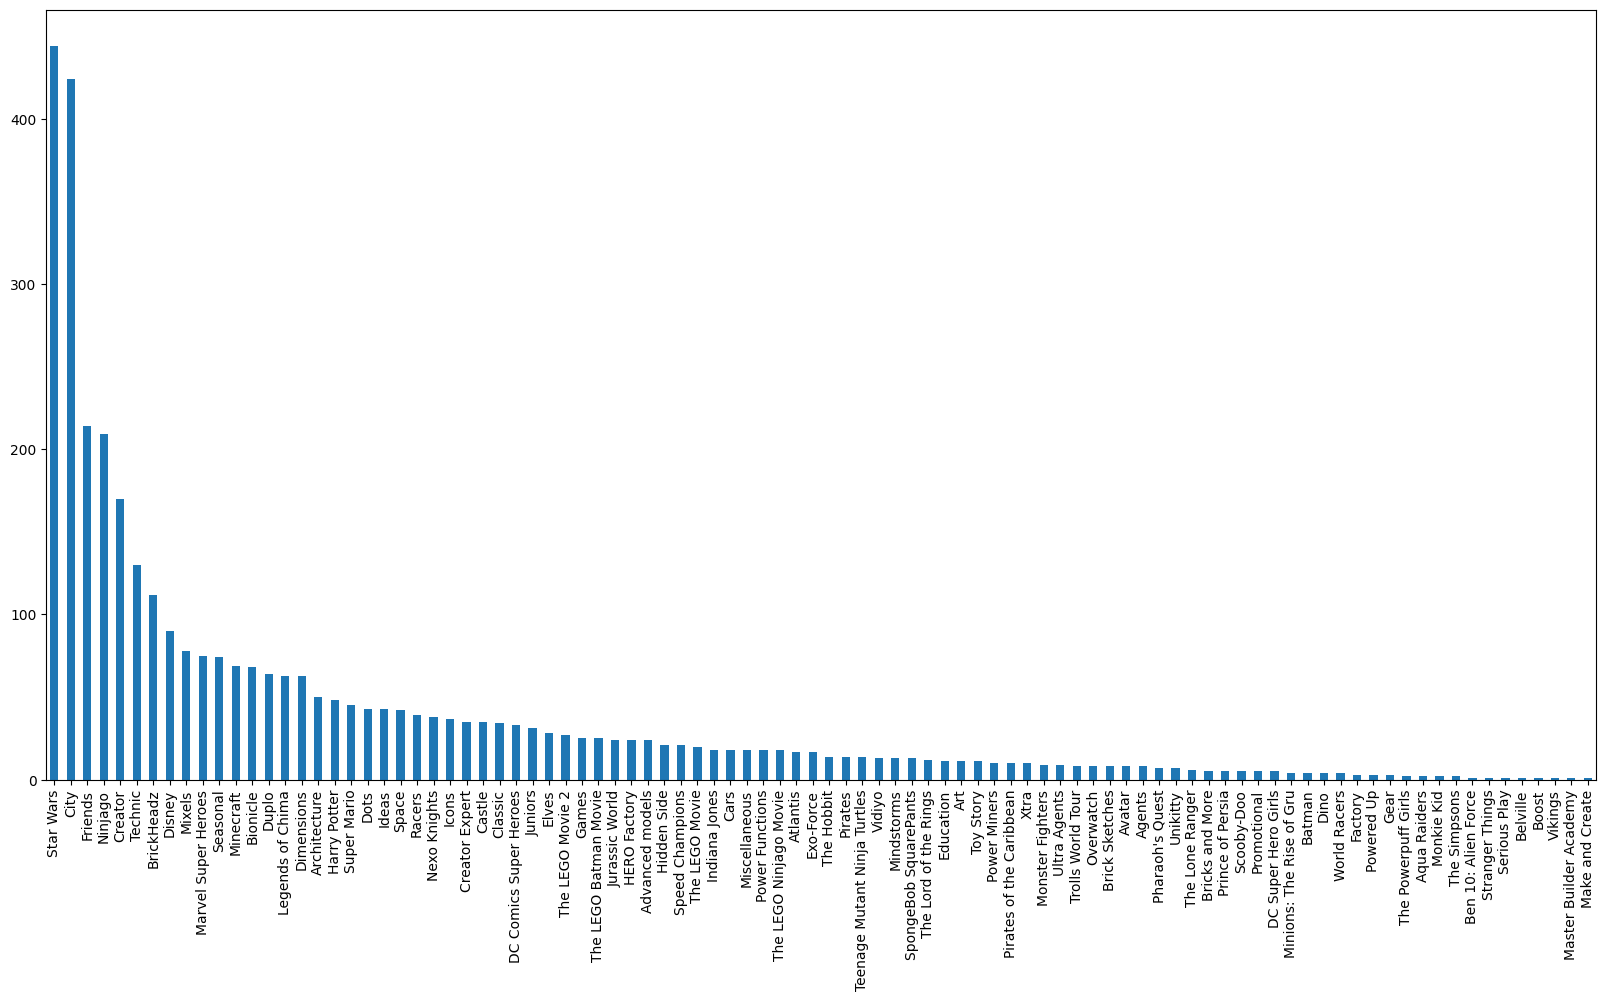

In [350]:
SETS_after_2005_df['Theme'].value_counts().plot(kind='bar', figsize=(20,10))

<Axes: >

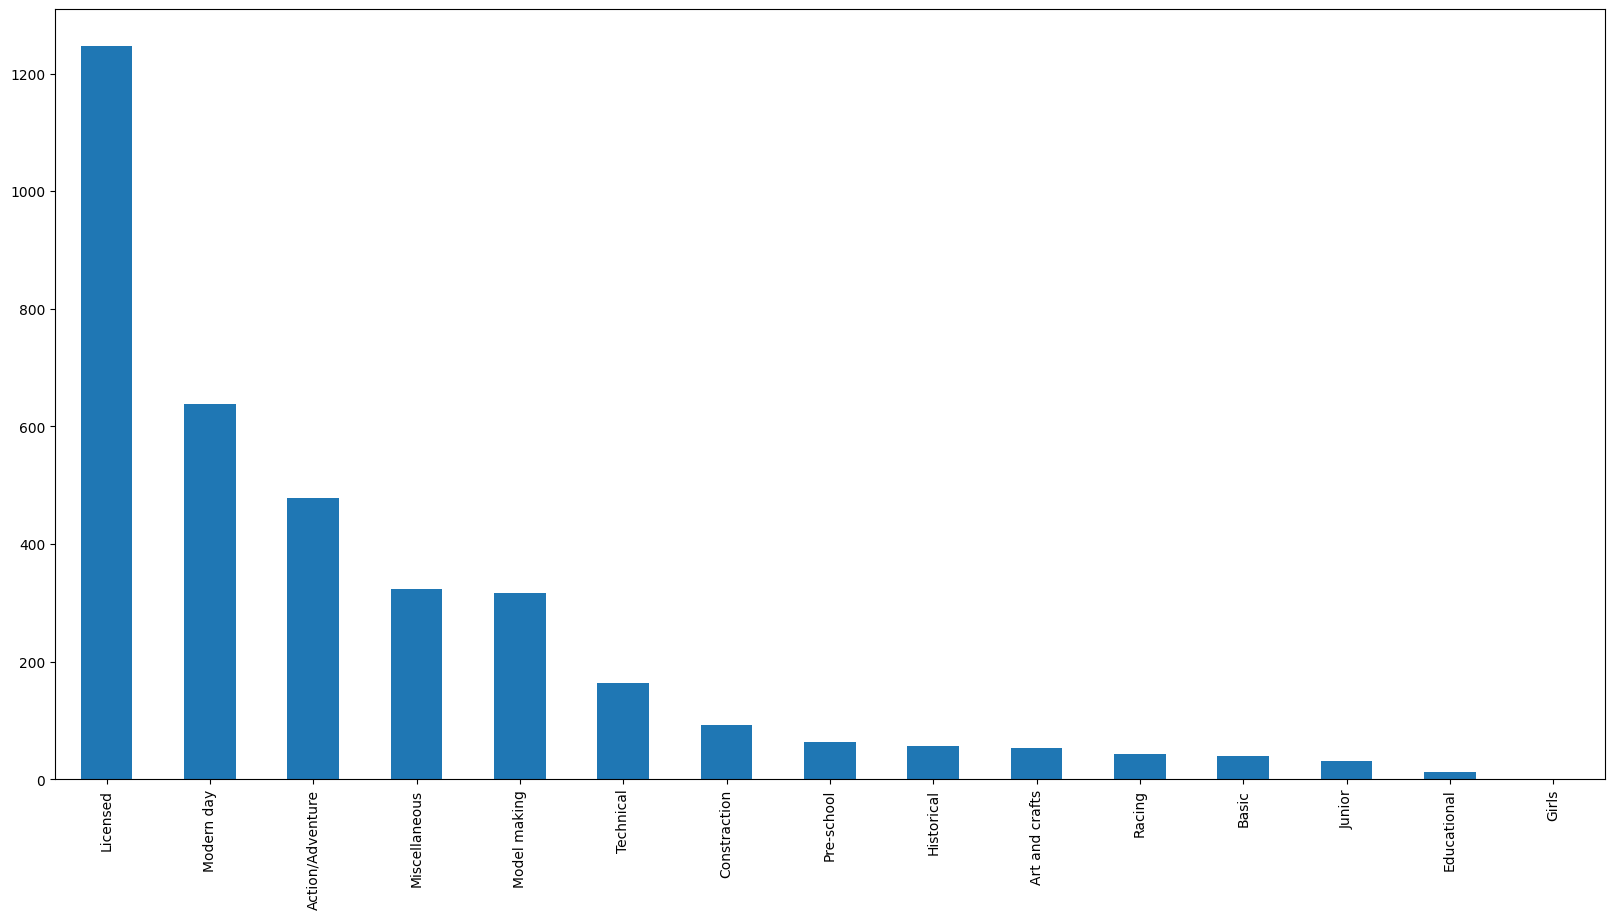

In [351]:
SETS_after_2005_df['Theme_Group'].value_counts().plot(kind='bar', figsize=(20,10))

In [352]:
# count how many distinct Subthemes there are

SETS_after_2005_df['Subtheme'].nunique()

411

As there are too many different Subthemes, we drop the column completely. 

In [353]:
# drop column Subtheme from SETS_after_2005_df

SETS_after_2005_df.drop(columns=['Subtheme'], inplace=True)
SETS_after_2005_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3563 entries, 6104 to 14897
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Set_ID                  3563 non-null   object 
 1   Name                    3563 non-null   object 
 2   Year                    3563 non-null   int64  
 3   Theme                   3563 non-null   object 
 4   Theme_Group             3563 non-null   object 
 5   Category                3563 non-null   object 
 6   Packaging               3563 non-null   object 
 7   Num_Instructions        3563 non-null   int64  
 8   Availability            3563 non-null   object 
 9   Pieces                  3559 non-null   float64
 10  Minifigures             3563 non-null   float64
 11  Owned                   3563 non-null   float64
 12  Rating                  3563 non-null   float64
 13  USD_MSRP                3563 non-null   float64
 14  Total_Quantity          3563 non-nul

In [354]:
SETS_after_2005_df['Packaging'].value_counts()

Box                      3071
Foil pack                 134
{Not specified}           117
Polybag                    74
Blister pack               48
Box with backing card      27
Plastic canister           24
Canister                   19
Other                      15
Tub                        10
Shrink-wrapped             10
Plastic box                 9
Box with handle             5
Name: Packaging, dtype: int64

In [355]:
SETS_after_2005_df['Category'].value_counts()

Normal        3536
Extended        19
Collection       4
Gear             3
Other            1
Name: Category, dtype: int64

Because both Packaging and Category have one value that has a significantly more representatives than others, it gives the data set little value, could overfit for the other categories, so we drop both columns. 

In [356]:
# drop columns Category and Packaging from SETS_after_2005_df

SETS_after_2005_df.drop(columns=['Category', 'Packaging'], inplace=True)
SETS_after_2005_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3563 entries, 6104 to 14897
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Set_ID                  3563 non-null   object 
 1   Name                    3563 non-null   object 
 2   Year                    3563 non-null   int64  
 3   Theme                   3563 non-null   object 
 4   Theme_Group             3563 non-null   object 
 5   Num_Instructions        3563 non-null   int64  
 6   Availability            3563 non-null   object 
 7   Pieces                  3559 non-null   float64
 8   Minifigures             3563 non-null   float64
 9   Owned                   3563 non-null   float64
 10  Rating                  3563 non-null   float64
 11  USD_MSRP                3563 non-null   float64
 12  Total_Quantity          3563 non-null   float64
 13  Current_Price           3563 non-null   float64
 14  USD_MSRP_adjusted_2022  3563 non-nul

### ID and Name

In [357]:
# drop column Set_ID and Name

SETS_after_2005_df.drop(columns=['Set_ID', 'Name'], inplace=True)
SETS_after_2005_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3563 entries, 6104 to 14897
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    3563 non-null   int64  
 1   Theme                   3563 non-null   object 
 2   Theme_Group             3563 non-null   object 
 3   Num_Instructions        3563 non-null   int64  
 4   Availability            3563 non-null   object 
 5   Pieces                  3559 non-null   float64
 6   Minifigures             3563 non-null   float64
 7   Owned                   3563 non-null   float64
 8   Rating                  3563 non-null   float64
 9   USD_MSRP                3563 non-null   float64
 10  Total_Quantity          3563 non-null   float64
 11  Current_Price           3563 non-null   float64
 12  USD_MSRP_adjusted_2022  3563 non-null   float64
dtypes: float64(8), int64(2), object(3)
memory usage: 389.7+ KB


### Availability

In [358]:
SETS_after_2005_df['Availability'].value_counts()

Retail              2672
LEGO exclusive       385
{Not specified}      271
Retail - limited     224
Educational            5
Promotional            4
Unknown                1
Not sold               1
Name: Availability, dtype: int64

In [359]:
# remove rows that have 'Availability' = '{Not specified}', 'Educational', 'Promotional', 'Unknown' or 'Not sold'

SETS_after_2005_df = SETS_after_2005_df[(SETS_after_2005_df['Availability'] != '{Not specified}') & (SETS_after_2005_df['Availability'] != 'Educational') & (SETS_after_2005_df['Availability'] != 'Promotional') & (SETS_after_2005_df['Availability'] != 'Unknown') & (SETS_after_2005_df['Availability'] != 'Not sold')]
SETS_after_2005_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3281 entries, 6104 to 14897
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    3281 non-null   int64  
 1   Theme                   3281 non-null   object 
 2   Theme_Group             3281 non-null   object 
 3   Num_Instructions        3281 non-null   int64  
 4   Availability            3281 non-null   object 
 5   Pieces                  3280 non-null   float64
 6   Minifigures             3281 non-null   float64
 7   Owned                   3281 non-null   float64
 8   Rating                  3281 non-null   float64
 9   USD_MSRP                3281 non-null   float64
 10  Total_Quantity          3281 non-null   float64
 11  Current_Price           3281 non-null   float64
 12  USD_MSRP_adjusted_2022  3281 non-null   float64
dtypes: float64(8), int64(2), object(3)
memory usage: 358.9+ KB


In [360]:
SETS_after_2005_df['Availability'].value_counts()

Retail              2672
LEGO exclusive       385
Retail - limited     224
Name: Availability, dtype: int64

### Year to years on market

In [361]:
# create a column with the number of years since the set was released

SETS_after_2005_df['Years_Since_Release'] = 2023 - SETS_after_2005_df['Year']
SETS_after_2005_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3281 entries, 6104 to 14897
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    3281 non-null   int64  
 1   Theme                   3281 non-null   object 
 2   Theme_Group             3281 non-null   object 
 3   Num_Instructions        3281 non-null   int64  
 4   Availability            3281 non-null   object 
 5   Pieces                  3280 non-null   float64
 6   Minifigures             3281 non-null   float64
 7   Owned                   3281 non-null   float64
 8   Rating                  3281 non-null   float64
 9   USD_MSRP                3281 non-null   float64
 10  Total_Quantity          3281 non-null   float64
 11  Current_Price           3281 non-null   float64
 12  USD_MSRP_adjusted_2022  3281 non-null   float64
 13  Years_Since_Release     3281 non-null   int64  
dtypes: float64(8), int64(3), object(3)
m

In [362]:
# drop column Year

SETS_after_2005_df.drop(columns=['Year'], inplace=True)
SETS_after_2005_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3281 entries, 6104 to 14897
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Theme                   3281 non-null   object 
 1   Theme_Group             3281 non-null   object 
 2   Num_Instructions        3281 non-null   int64  
 3   Availability            3281 non-null   object 
 4   Pieces                  3280 non-null   float64
 5   Minifigures             3281 non-null   float64
 6   Owned                   3281 non-null   float64
 7   Rating                  3281 non-null   float64
 8   USD_MSRP                3281 non-null   float64
 9   Total_Quantity          3281 non-null   float64
 10  Current_Price           3281 non-null   float64
 11  USD_MSRP_adjusted_2022  3281 non-null   float64
 12  Years_Since_Release     3281 non-null   int64  
dtypes: float64(8), int64(2), object(3)
memory usage: 358.9+ KB


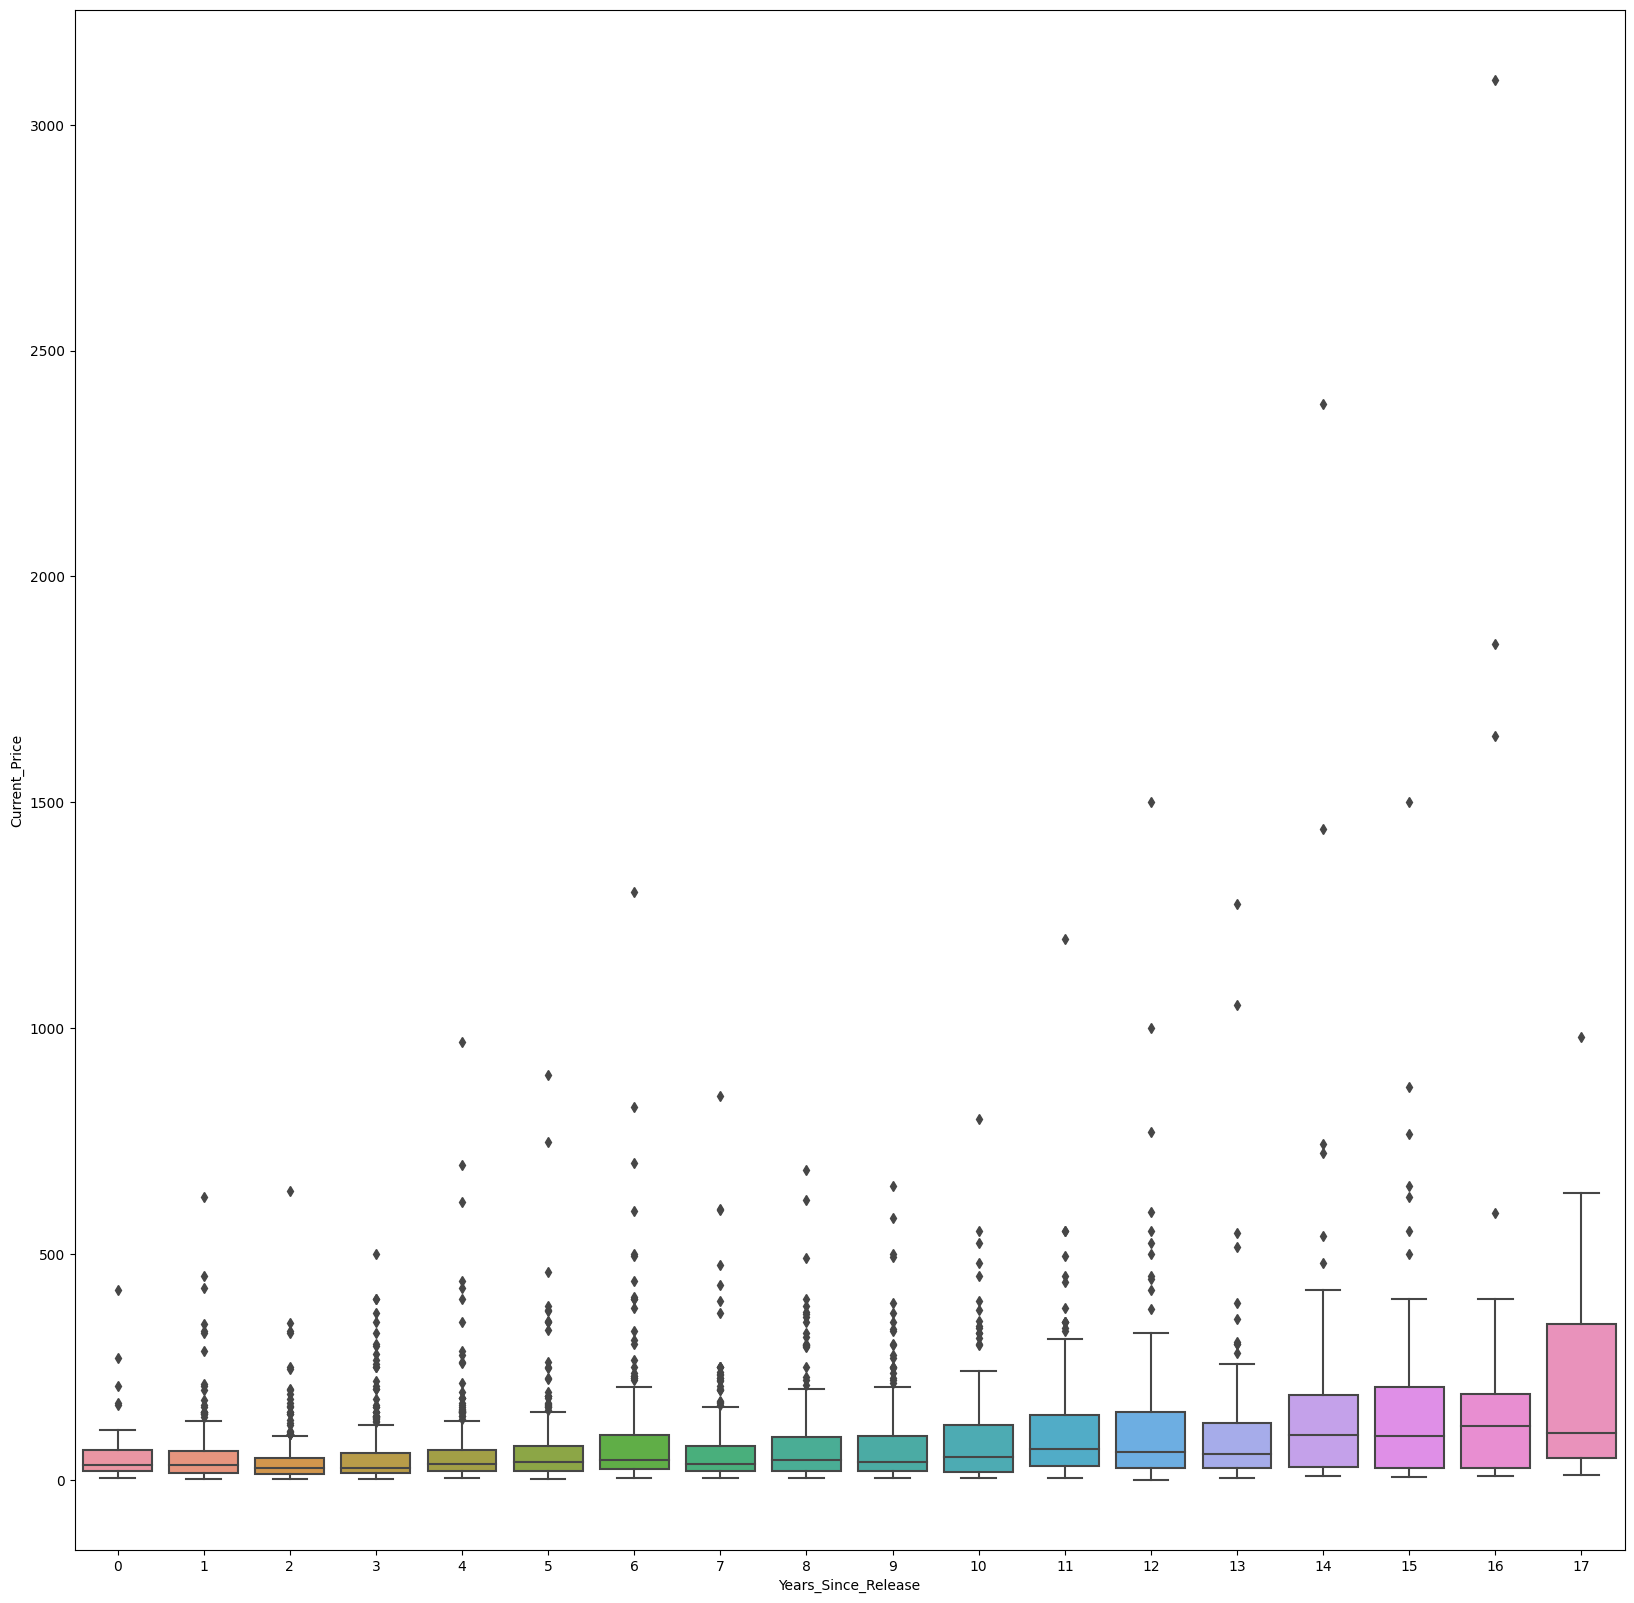

In [363]:
# plot a boxplot of Current_Price grouped by Years_Since_Release

plt.figure(figsize=(20,20))
sns.boxplot(x='Years_Since_Release', y='Current_Price', data=SETS_after_2005_df, showfliers=True)
plt.show()


In general, we can say the longer since it has been released, the higher the current price is. 

### One-hot encoding of Availability

In [364]:
# do one-hot encoding for values of Availability

SETS_after_2005_df = pd.get_dummies(SETS_after_2005_df, columns=['Availability'])
SETS_after_2005_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3281 entries, 6104 to 14897
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Theme                          3281 non-null   object 
 1   Theme_Group                    3281 non-null   object 
 2   Num_Instructions               3281 non-null   int64  
 3   Pieces                         3280 non-null   float64
 4   Minifigures                    3281 non-null   float64
 5   Owned                          3281 non-null   float64
 6   Rating                         3281 non-null   float64
 7   USD_MSRP                       3281 non-null   float64
 8   Total_Quantity                 3281 non-null   float64
 9   Current_Price                  3281 non-null   float64
 10  USD_MSRP_adjusted_2022         3281 non-null   float64
 11  Years_Since_Release            3281 non-null   int64  
 12  Availability_LEGO exclusive    3281 non-null

### One-hot encoding of Theme_Groups

In [365]:
# do one-hot encoding for values of Theme_Group

SETS_after_2005_df = pd.get_dummies(SETS_after_2005_df, columns=['Theme_Group'])
SETS_after_2005_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3281 entries, 6104 to 14897
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Theme                          3281 non-null   object 
 1   Num_Instructions               3281 non-null   int64  
 2   Pieces                         3280 non-null   float64
 3   Minifigures                    3281 non-null   float64
 4   Owned                          3281 non-null   float64
 5   Rating                         3281 non-null   float64
 6   USD_MSRP                       3281 non-null   float64
 7   Total_Quantity                 3281 non-null   float64
 8   Current_Price                  3281 non-null   float64
 9   USD_MSRP_adjusted_2022         3281 non-null   float64
 10  Years_Since_Release            3281 non-null   int64  
 11  Availability_LEGO exclusive    3281 non-null   uint8  
 12  Availability_Retail            3281 non-null

### One-hot encoding of Theme

In [366]:
SETS_after_2005_df = pd.get_dummies(SETS_after_2005_df, columns=['Theme'])
SETS_after_2005_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3281 entries, 6104 to 14897
Columns: 118 entries, Num_Instructions to Theme_Xtra
dtypes: float64(8), int64(2), uint8(108)
memory usage: 628.0 KB


## Correlation matrix

In [367]:
# create a correlation matrix of SETS_after_2005_df_copy

corr_matrix = SETS_after_2005_df.corr()
corr_matrix

,Num_Instructions,Pieces,Minifigures,Owned,Rating,USD_MSRP,Total_Quantity,Current_Price,USD_MSRP_adjusted_2022,Years_Since_Release,...,Theme_The Powerpuff Girls,Theme_The Simpsons,Theme_Toy Story,Theme_Trolls World Tour,Theme_Ultra Agents,Theme_Unikitty,Theme_Vidiyo,Theme_Vikings,Theme_World Racers,Theme_Xtra
Num_Instructions,1.000000,0.508175,0.154134,0.092779,0.137289,0.509175,-0.038201,0.196218,0.488167,-0.158748,...,-0.011684,0.006554,0.015391,-0.000572,-0.003296,-0.002364,-0.029840,-0.008261,0.004633,-0.058824
Pieces,0.508175,1.000000,0.335258,0.177349,0.190755,0.904474,-0.000150,0.574350,0.892924,-0.101149,...,-0.009262,0.063151,-0.015125,-0.012423,-0.004343,-0.012940,-0.016630,0.000995,-0.002576,-0.032283
Minifigures,0.154134,0.335258,1.000000,0.190853,0.154699,0.407906,0.016801,0.335483,0.414791,0.009634,...,0.009310,0.031899,-0.004179,0.007332,0.010176,0.050056,-0.017938,0.003388,0.016164,-0.049960
Owned,0.092779,0.177349,0.190853,1.000000,0.376253,0.174470,0.357357,0.184423,0.193577,0.162386,...,-0.020600,0.044527,0.008178,-0.042824,-0.026741,-0.037976,-0.035840,-0.013031,-0.014476,-0.015208
Rating,0.137289,0.190755,0.154699,0.376253,1.000000,0.177958,0.105289,0.217847,0.198486,0.217788,...,0.002630,0.018970,0.023837,-0.067819,0.014983,-0.020477,-0.009934,0.011246,0.004026,0.015034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Theme_Unikitty,-0.002364,-0.012940,0.050056,-0.037976,-0.020477,-0.018621,0.043753,-0.018147,-0.019202,-0.019598,...,-0.001142,-0.001142,-0.002682,-0.002286,-0.002425,1.000000,-0.002916,-0.000807,-0.000807,-0.002557
Theme_Vidiyo,-0.029840,-0.016630,-0.017938,-0.035840,-0.009934,-0.014277,-0.001574,-0.028154,-0.017421,-0.072461,...,-0.001558,-0.001558,-0.003658,-0.003118,-0.003308,-0.002916,1.000000,-0.001101,-0.001101,-0.003487
Theme_Vikings,-0.008261,0.000995,0.003388,-0.013031,0.011246,-0.002028,-0.005854,0.000784,0.000556,0.043238,...,-0.000431,-0.000431,-0.001013,-0.000863,-0.000916,-0.000807,-0.001101,1.000000,-0.000305,-0.000965
Theme_World Racers,0.004633,-0.002576,0.016164,-0.014476,0.004026,-0.002028,-0.007708,-0.006122,-0.000499,0.026359,...,-0.000431,-0.000431,-0.001013,-0.000863,-0.000916,-0.000807,-0.001101,-0.000305,1.000000,-0.000965


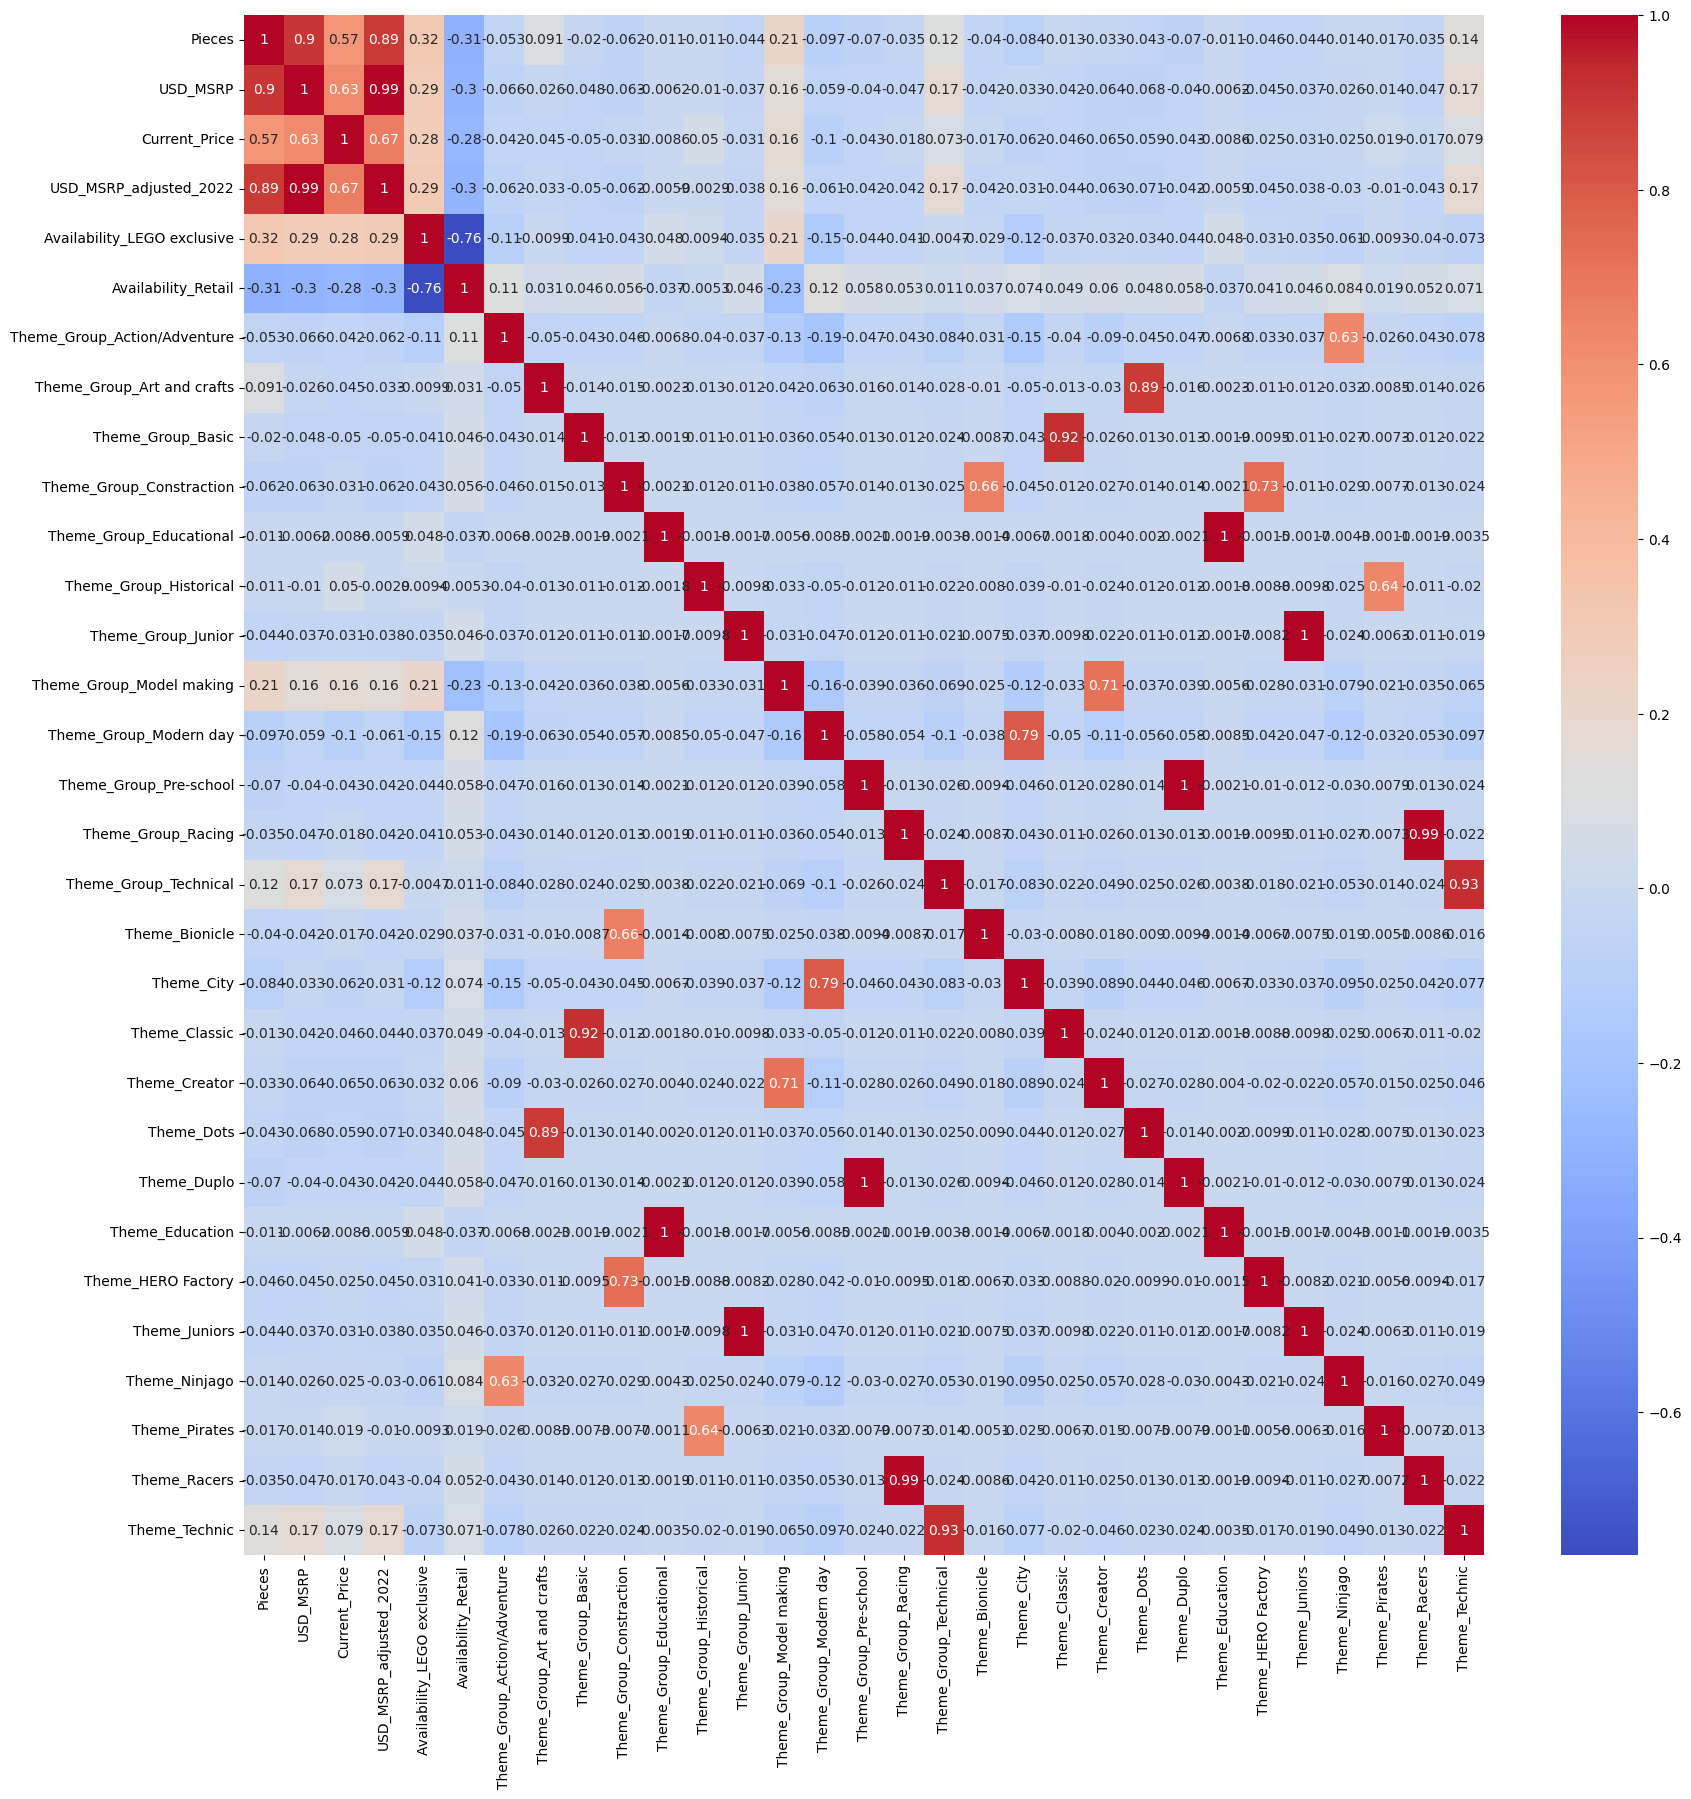

In [368]:
# show the correlation matrix as a heatmap but only of those with correlation > 0.7 or < -0.7, ignoring the diagonal

import numpy as np

# Create a mask for correlations > 0.7 or < -0.7
mask = np.abs(corr_matrix) < 0.6

# Set the diagonal values to True
np.fill_diagonal(mask.values, True)

# Filter the correlation matrix
filtered_corr_matrix = corr_matrix.loc[~mask.all(), ~mask.all()]

plt.figure(figsize=(20,20))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm')
plt.show()

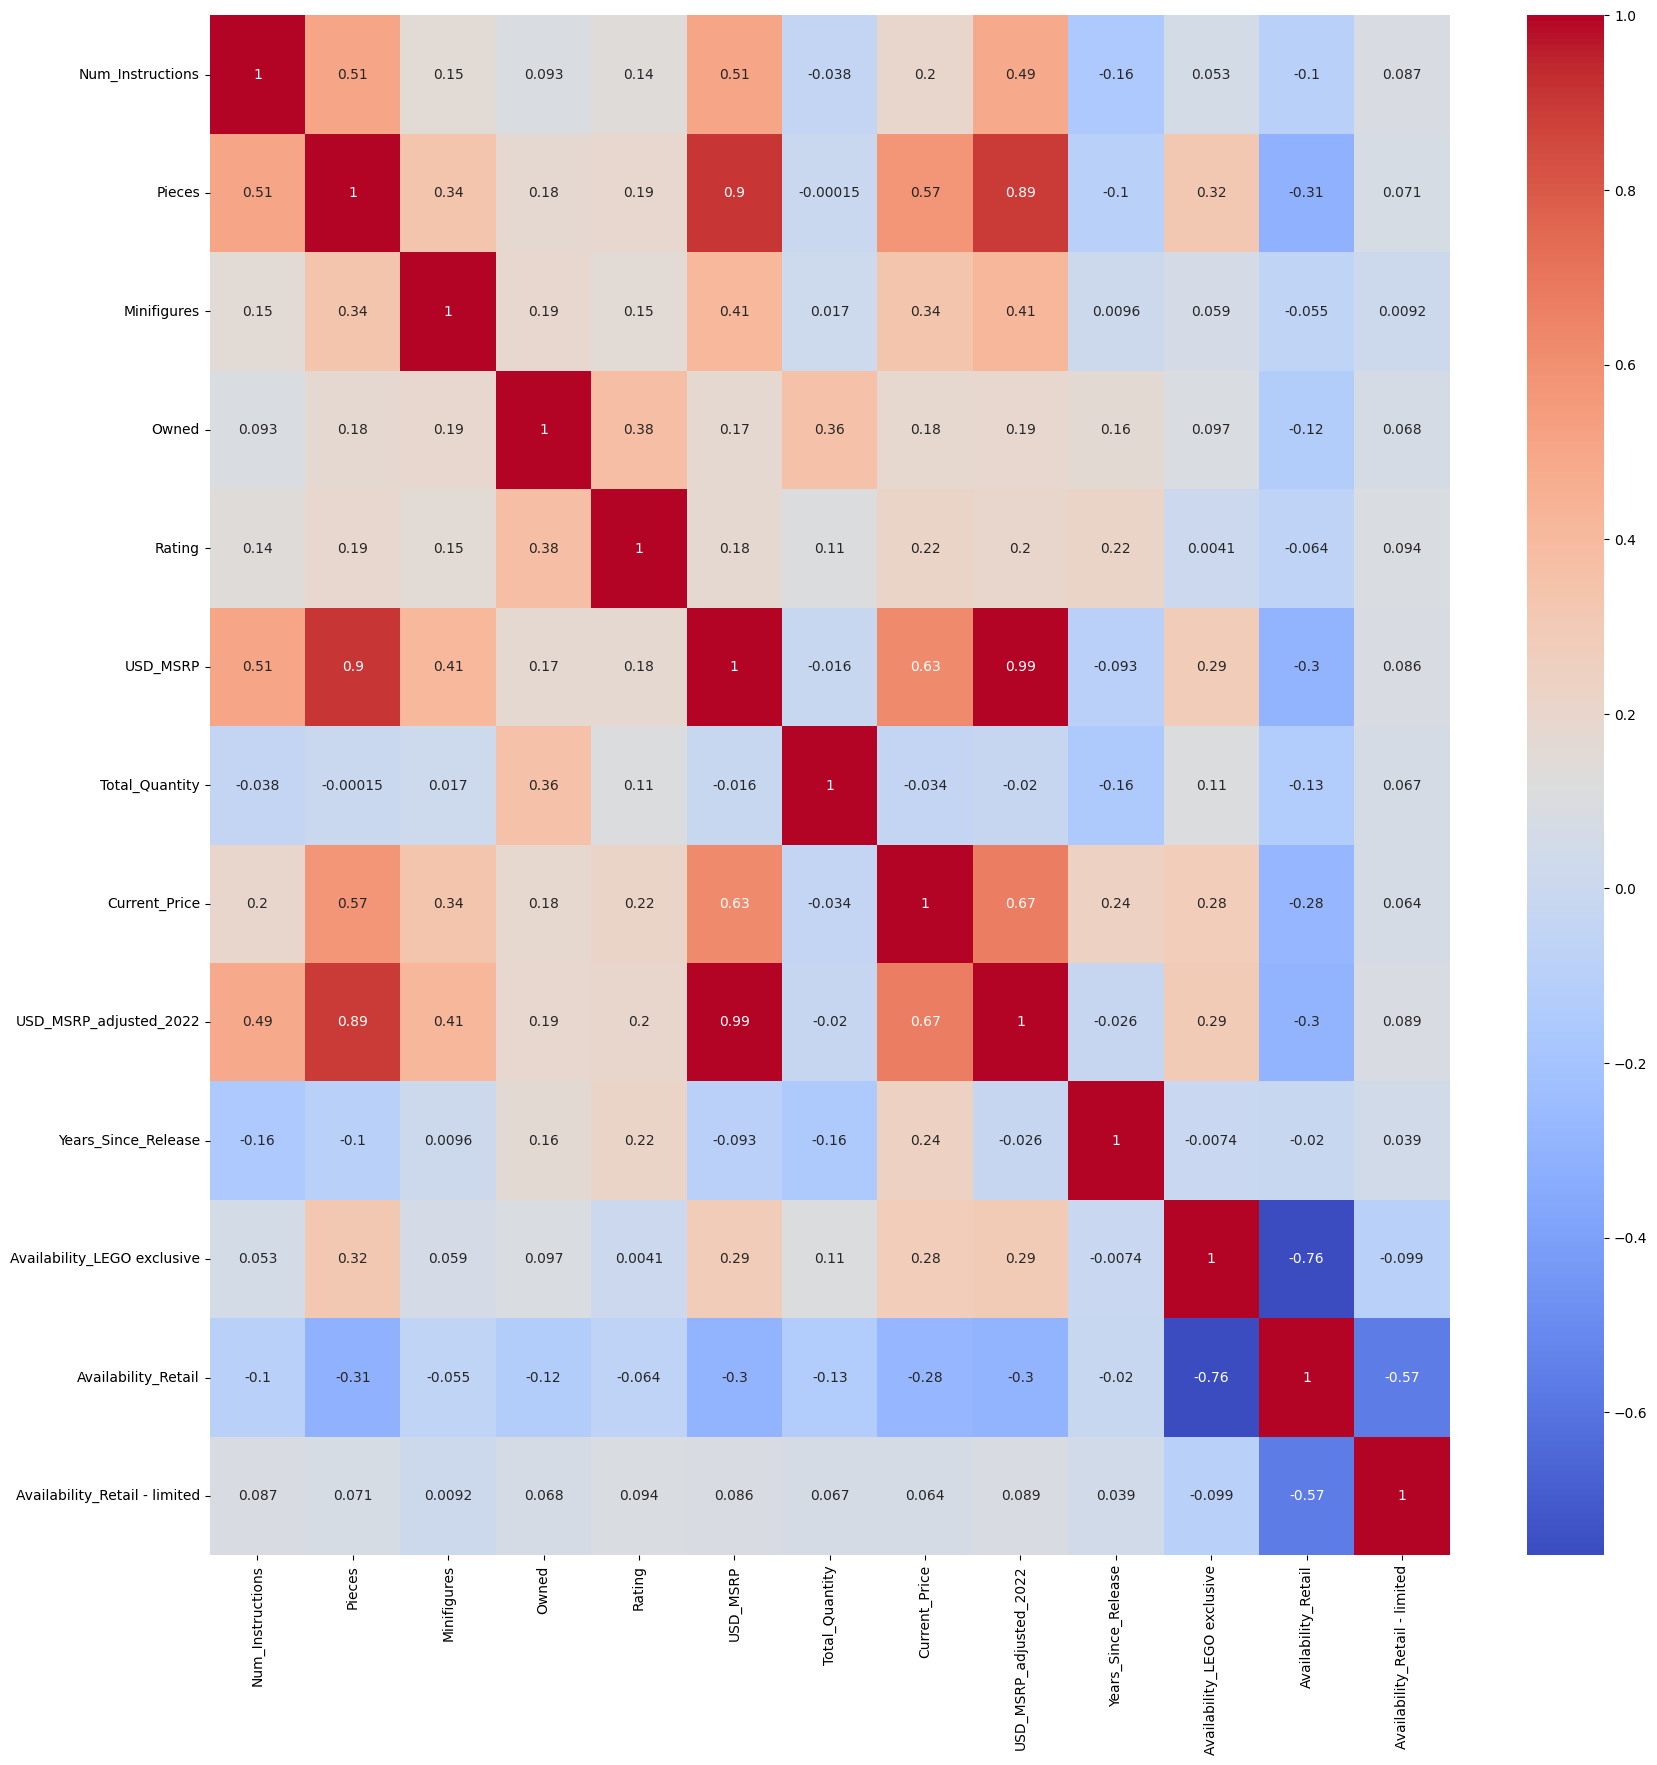

In [369]:
# plot correlation map

# create a data frame as a copy of SETS_after_2005_df_copy but without columns starting by 'Theme_'

testing = SETS_after_2005_df.copy()
# remove columns from testing not in the columns list
columns = ['Num_Instructions', 'Pieces', 'Minifigures', 'Owned', 'Rating', 'USD_MSRP', 'Total_Quantity', 'Current_Price', 'USD_MSRP_adjusted_2022', 'Years_Since_Release', 'Availability_LEGO exclusive', 'Availability_Retail', 'Availability_Retail - limited']

for column in testing.columns:
    if column not in columns:
        testing.drop(columns=[column], inplace=True)


plt.figure(figsize=(20,20))
sns.heatmap(testing.corr(), annot=True, cmap='coolwarm')
plt.show()

Looking at correlation of Availability one-hot encoding, we chose to remove the Availability_Retail. By removing it, all the information still remains, because if it is not Retail limited and neither is it LEGO exclusive, it must be Retail. 

### Dropping correlating features

In [370]:
SETS_after_2005_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3281 entries, 6104 to 14897
Columns: 118 entries, Num_Instructions to Theme_Xtra
dtypes: float64(8), int64(2), uint8(108)
memory usage: 628.0 KB


In [371]:
# drop Pieces, Availability_Retail and USD_MSRP columns

SETS_after_2005_df.drop(columns=['Pieces', 'Availability_Retail', 'USD_MSRP'], inplace=True)
SETS_after_2005_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3281 entries, 6104 to 14897
Columns: 115 entries, Num_Instructions to Theme_Xtra
dtypes: float64(6), int64(2), uint8(107)
memory usage: 573.5 KB


In [373]:
# drop Theme_Group_Action/Adventure, Theme_Group_Arts and crafts, Theme_Group_Basic, Theme_Group_Constraction, Theme_Group_Educational, Theme_Group_Historical, Theme_Group_Junior, Theme_Group_Model making, Theme_Group_Modern day, Theme_Group_Pre-school, Theme_Group_Racing, Theme_Group_Technical

SETS_after_2005_df.drop(columns=['Theme_Group_Action/Adventure', 'Theme_Group_Art and crafts', 'Theme_Group_Basic', 'Theme_Group_Constraction', 'Theme_Group_Educational', 'Theme_Group_Historical', 'Theme_Group_Junior', 'Theme_Group_Model making', 'Theme_Group_Modern day', 'Theme_Group_Pre-school', 'Theme_Group_Racing', 'Theme_Group_Technical'], inplace=True)
SETS_after_2005_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3281 entries, 6104 to 14897
Columns: 103 entries, Num_Instructions to Theme_Xtra
dtypes: float64(6), int64(2), uint8(95)
memory usage: 535.1 KB


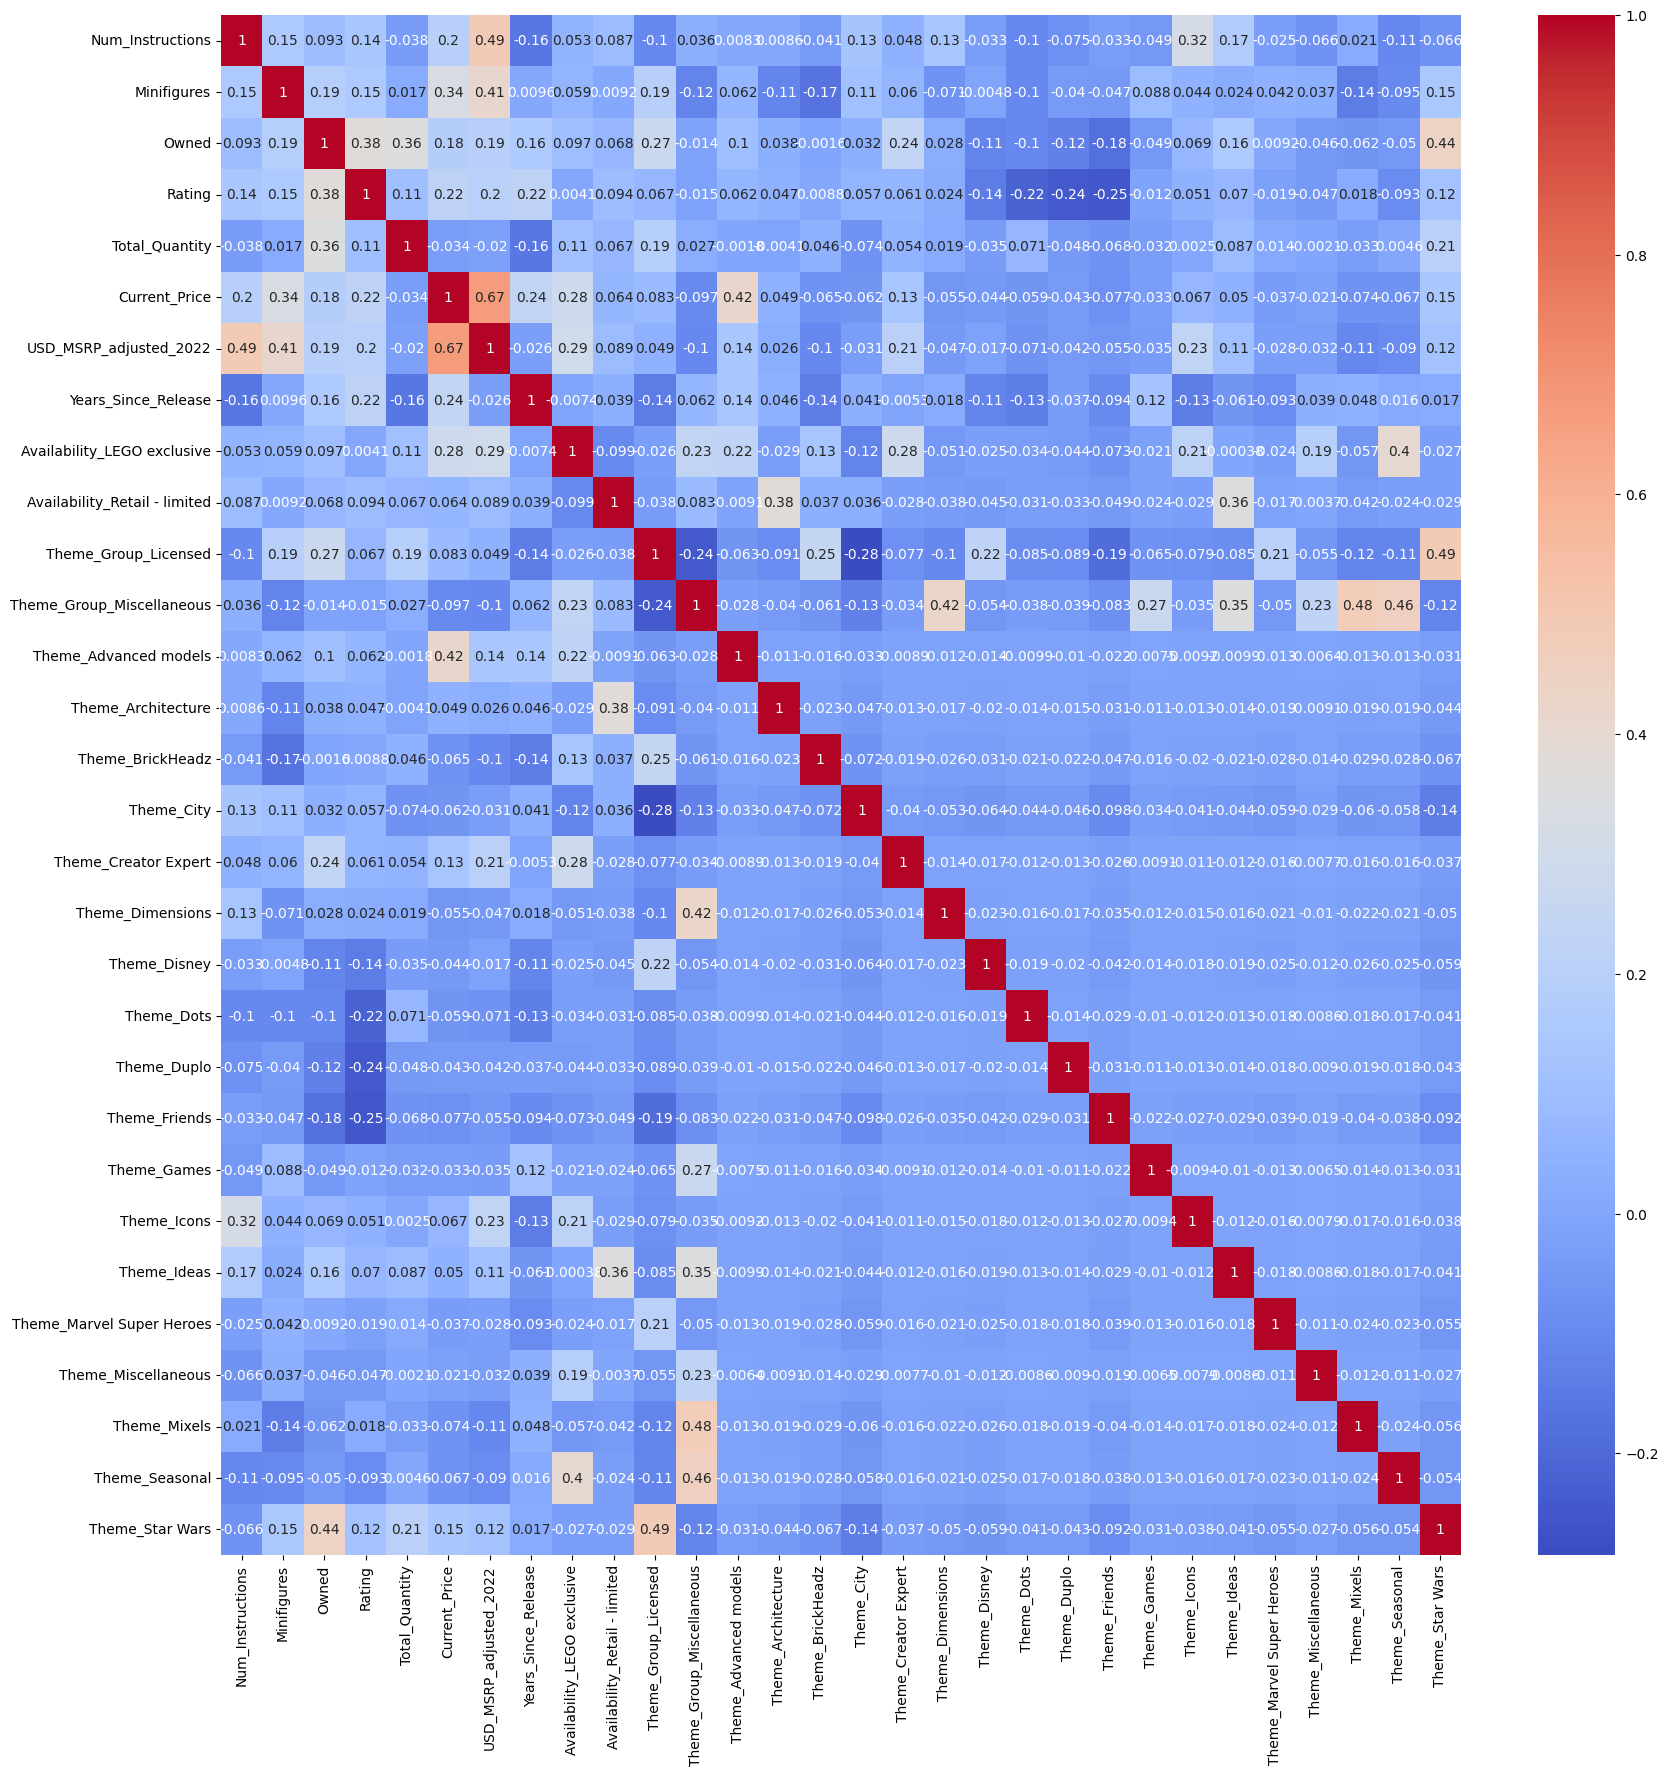

In [378]:
fixed_correlation_matrix = SETS_after_2005_df.corr()

mask = np.abs(fixed_correlation_matrix) < 0.2
np.fill_diagonal(mask.values, True)
filtered_corr_matrix = fixed_correlation_matrix.loc[~mask.all(), ~mask.all()]

plt.figure(figsize=(20,20))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm')
plt.show()

As the only highly correlated features are Current_Price and USD_MSRP_adjusted_2022, we keep it as it is, as Current_Price is what we will be estimating. 

### Adjust current price to 2022 dollars